# ICP + Non-linear least squares optimization

Samartha S M

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
from sklearn.neighbors import KDTree
import copy

from helpers.func import make_gaussian
from helpers.func import make_non_linear

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png' alt=drawing width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

## Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

## Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589, & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405, & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

In [105]:
# Function to obtain Jacobian of the residual for Gaussian
def get_Gaussian_Jr(x, params):
    a, mean, std = params
    return np.array([
        np.exp(-(x-mean)**2/(2*std**2))/(np.sqrt(2*np.pi)*std),
        a*(x-mean)*np.exp(-(x-mean)**2/(2*std**2))/(np.sqrt(2*np.pi)*std**3),
        a*(x-mean)**2*np.exp(-(x-mean)**2/(2*std**2))/(np.sqrt(2*np.pi)*std**4)
    ])

# Function to compute residual of Gaussian
def get_Gaussian_res(x, params, y):
    a, mean, std = params
    return make_gaussian(x, a, mean, std) - y

In [106]:
# Function to train params by minimizing residual
def training_Gaussian(x, y, params, args):
    costs = []
    for ep in range(args["num_epochs"]):
        res = get_Gaussian_res(x, params, y)
        costs.append(np.linalg.norm(res)**2)
        if (ep != 0) and (abs(costs[-1] - costs[-2]) < args["tol"]):
            print("Tolerance reached at epoch:", ep)
            break
        
        J_r = get_Gaussian_Jr(x, params)
        J_F = J_r @ res
        del_k = -args["alpha"]*J_F
        
        params += del_k
        
    return params, costs

In [204]:
# Function to obtain subplots
def plot_graphs(x, y, y_obs, costs):
    
    # Plotting plots
    fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(12, 4))

    # Loss vs iterations plot
    axs1.plot(np.arange(len(costs))+1, costs)
    axs1.set_title("loss vs number of iterations for gradient descent")
    axs1.set_xlabel("iterations")
    axs1.set_ylabel("loss")

    # Observation plot
    axs2.plot(x, y, "-*", color="orange", label="Ground Truth")
    axs2.plot(x, y_obs, "-*", color="blue", label="Predicted")
    axs2.set_title("Predicted vs GT Gaussians by Gradient Descent")
    axs2.legend()

    plt.show()
    
# Function to get args dictionary
def get_args(num_epochs, alpha, tol):
    return {
        "num_epochs": num_epochs,
        "alpha": alpha,
        "tol": tol
    }

In [143]:
def format_output_Gaussian(true_params, init_params, args):
    a, mean, std = true_params
    
    # Training and Plotting data
    x_dat = np.linspace(-25, 25, 50)
    y_dat = make_gaussian(x_dat, a, mean, std)
    
    # Training
    new_params, costs = training_Gaussian(x_dat, y_dat, init_params, args)
    
    # Observed data
    a, mean, std = new_params
    y_obs = make_gaussian(x_dat, a, mean, std)

    # Printing
    print("True Params (a, mean, std):", true_params, "\nInitial Params (a, mean, std):", init_params, "\nParams (a, mean, std):", new_params, "\nNumber of iterations:", args['num_epochs'], ", learning rate:", args["alpha"], ", tolerance:", args['tol'])
    
    # Plotting graphs
    plot_graphs(x_dat, y_dat, y_obs, costs)

### Experimentation with number of iterations (epochs)

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.96254826  2.96295849 19.12563104] 
Number of iterations: 100 , learning rate: 0.1 , tolerance: 1e-08


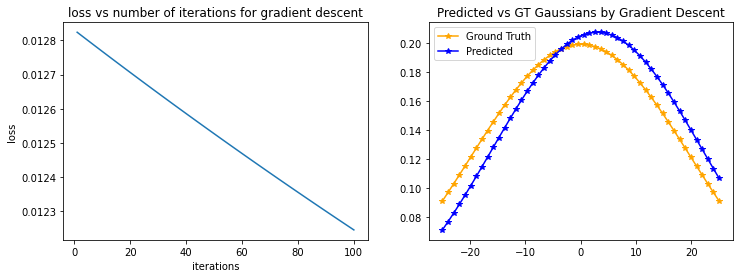

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.85725148  2.81971215 19.15406966] 
Number of iterations: 500 , learning rate: 0.1 , tolerance: 1e-08


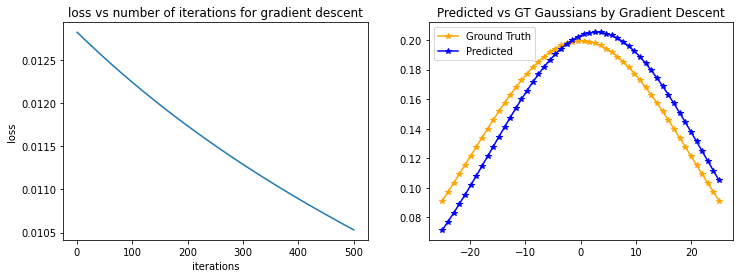

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.79166924  2.65121056 19.19663749] 
Number of iterations: 1000 , learning rate: 0.1 , tolerance: 1e-08


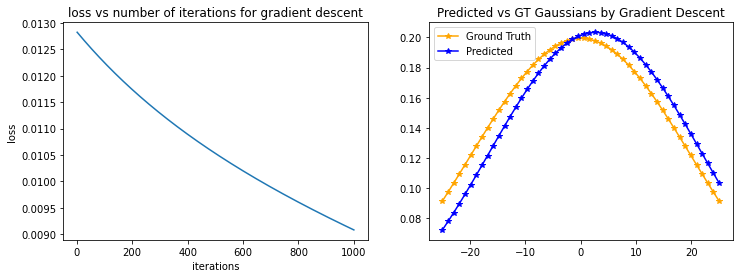

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.76029118  2.34615546 19.28470639] 
Number of iterations: 2000 , learning rate: 0.1 , tolerance: 1e-08


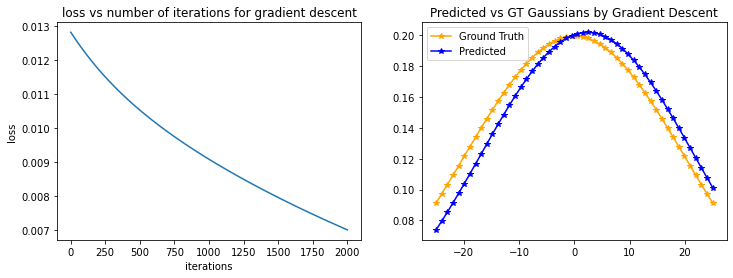

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.76456167  2.20803799 19.32579911] 
Number of iterations: 2500 , learning rate: 0.1 , tolerance: 1e-08


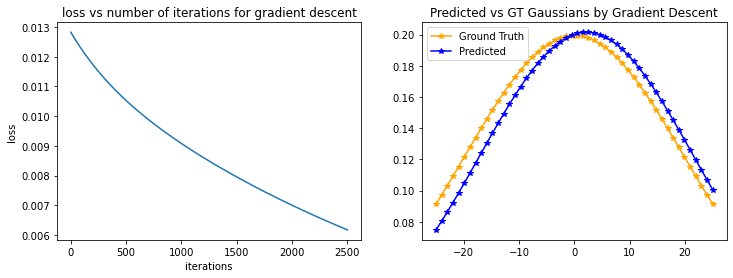

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.81595004  1.6360326  19.48857245] 
Number of iterations: 5000 , learning rate: 0.1 , tolerance: 1e-08


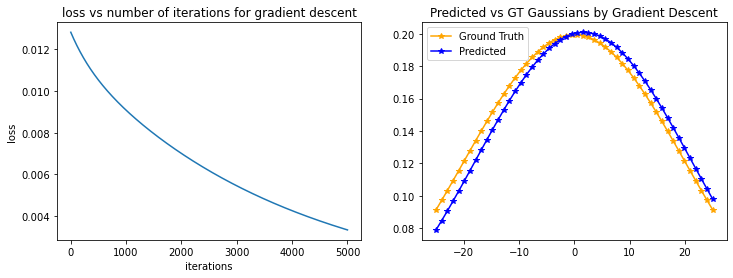

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.85697106  1.21754997 19.59630977] 
Number of iterations: 7500 , learning rate: 0.1 , tolerance: 1e-08


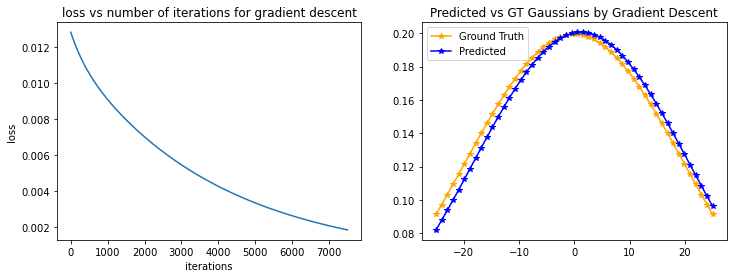

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.88496104  0.90887443 19.67100219] 
Number of iterations: 10000 , learning rate: 0.1 , tolerance: 1e-08


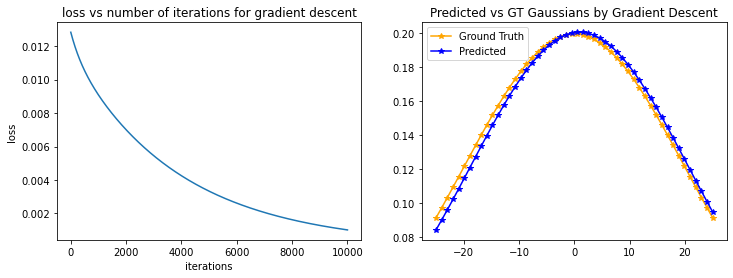

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.90495109  0.67996788 19.72564979] 
Number of iterations: 12500 , learning rate: 0.1 , tolerance: 1e-08


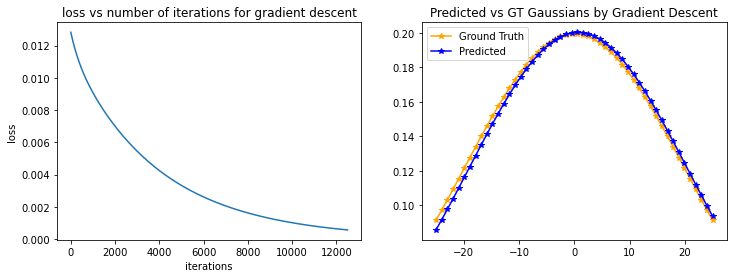

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.91996721  0.5095827  19.76754123] 
Number of iterations: 15000 , learning rate: 0.1 , tolerance: 1e-08


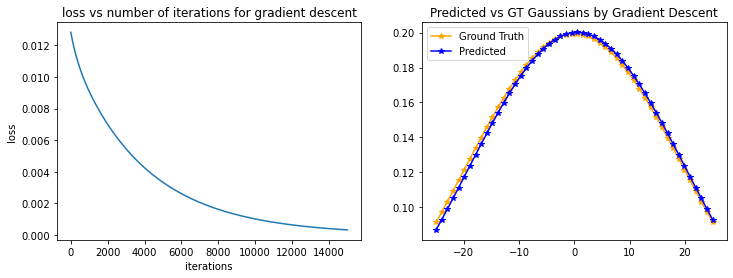

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.94125269  0.28729674 19.82817426] 
Number of iterations: 20000 , learning rate: 0.1 , tolerance: 1e-08


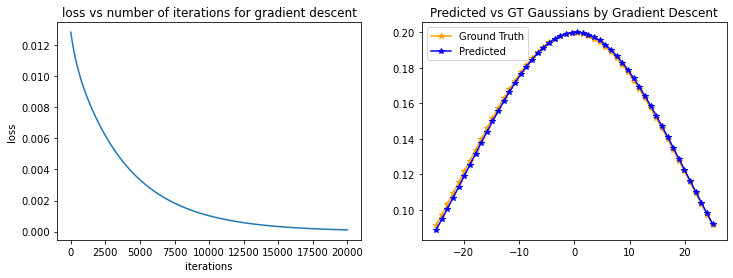

In [144]:
# True params
a, mean, std = 10, 0, 20
true_params = [a, mean, std]

# Initial guess of params
a, mean, std = 10, 3, 19.12
params = [a, mean, std]

# Different number of epochs
epochs_all = [100, 500, 1000, 2000, 2500, 5000, 7500, 10000, 12500, 15000, 20000]
for epoch_i in epochs_all:
    args = get_args(epoch_i, 0.1, 1e-8)
    format_output_Gaussian(true_params, params, args)

We can see from the above results and plots that with increasing number of iterations (or epochs) of training with Gradient Descent method, the parameters are learnt better. This is obvious because the parameters gradually shift towards the local minima using the gradient descent optimization and hence, depending on the learning rate, it requires varying number of iterations to converge to the local minima. In the above experimentation for number of iterations, we have used **learning rate (alpha) as 0.1**. We have used very low tolerance of 1e-8 so that it is not reached in between the training because we are analysing the parameter "number of iterations".

### Experimentation with learning rate

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.76458134  2.20807778 19.32578396] 
Number of iterations: 25000 , learning rate: 0.01 , tolerance: 1e-08


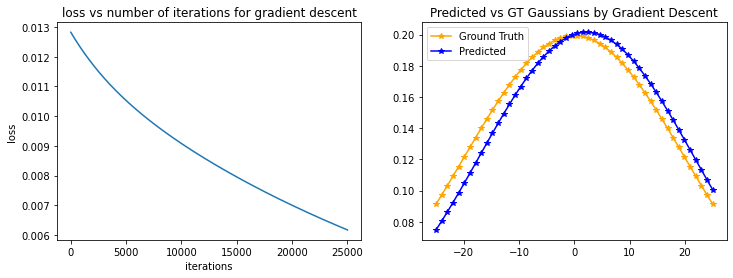

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.90494689  0.67999787 19.72563795] 
Number of iterations: 25000 , learning rate: 0.05 , tolerance: 1e-08


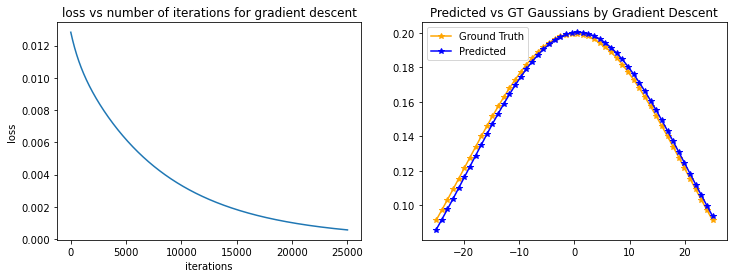

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.93672563  0.33142862 19.81516356] 
Number of iterations: 25000 , learning rate: 0.075 , tolerance: 1e-08


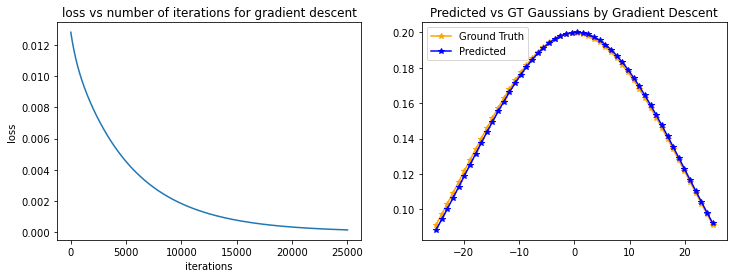

Tolerance reached at epoch: 23846
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.95286523  0.1853642  19.86178715] 
Number of iterations: 25000 , learning rate: 0.1 , tolerance: 1e-08


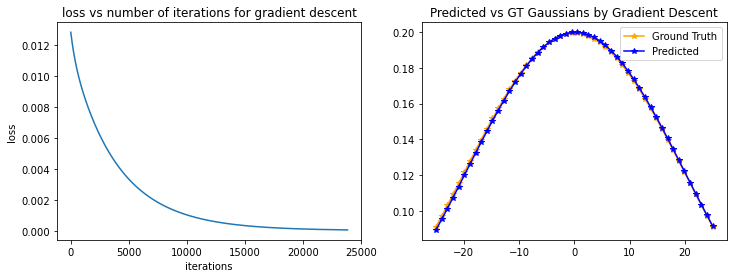

Tolerance reached at epoch: 13535
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.96057278  0.12852892 19.88425033] 
Number of iterations: 25000 , learning rate: 0.2 , tolerance: 1e-08


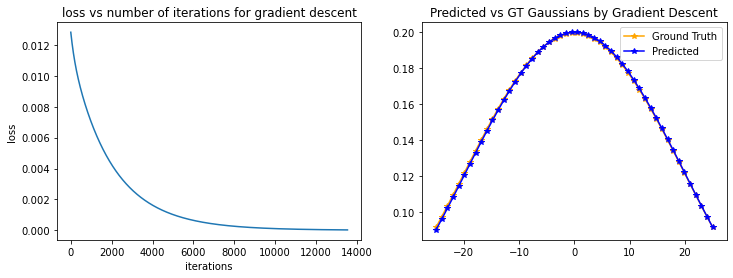

Tolerance reached at epoch: 11251
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.96278675  0.11400371 19.89072023] 
Number of iterations: 25000 , learning rate: 0.25 , tolerance: 1e-08


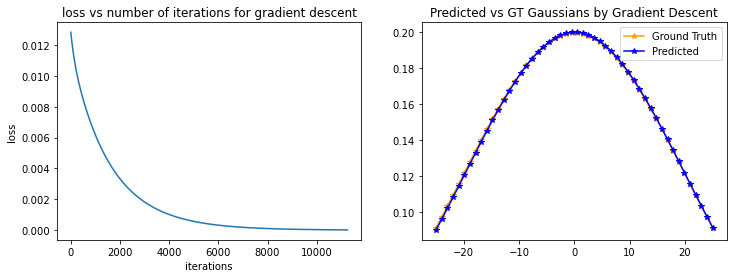

Tolerance reached at epoch: 7599
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.96709595  0.08816394 19.90333087] 
Number of iterations: 25000 , learning rate: 0.4 , tolerance: 1e-08


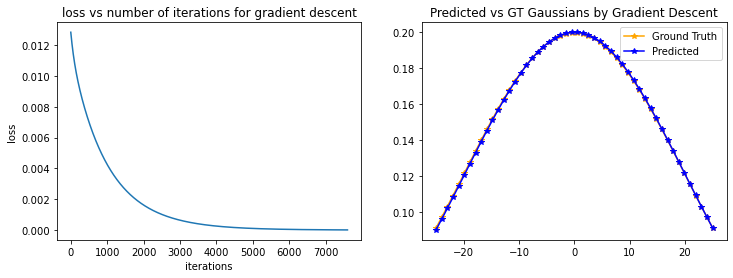

Tolerance reached at epoch: 6299
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.96898973  0.07784748 19.90887934] 
Number of iterations: 25000 , learning rate: 0.5 , tolerance: 1e-08


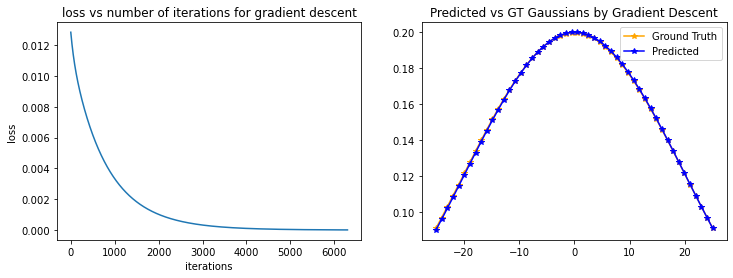

In [145]:
# True params
a, mean, std = 10, 0, 20
true_params = [a, mean, std]

# Initial guess of params
a, mean, std = 10, 3, 19.12
params = [a, mean, std]

# Different learning rates
alpha_all = [0.01, 0.05, 0.075, 0.1, 0.2, 0.25, 0.4, 0.5]
for alpha_i in alpha_all:
    args = get_args(25000, alpha_i, 1e-8)
    format_output_Gaussian(true_params, params, args)

Tolerance reached at epoch: 136416
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.91229241  0.59599028 19.7460367 ] 
Number of iterations: 250000 , learning rate: 0.01 , tolerance: 1e-08


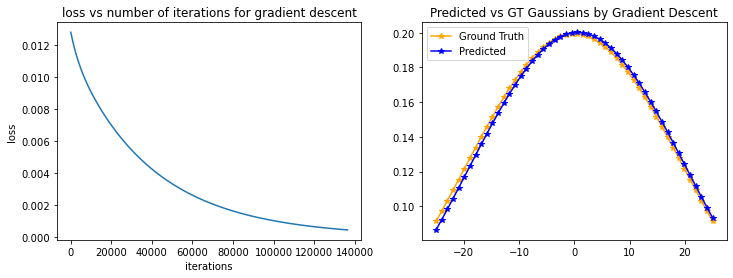

In [146]:
# True params
a, mean, std = 10, 0, 20
true_params = [a, mean, std]

# Initial guess of params
a, mean, std = 10, 3, 19.12
params = [a, mean, std]

# Different number of epochs
args = get_args(250000, 0.01, 1e-8)
format_output_Gaussian(true_params, params, args)

From the above plots, we can see that with increase in **learning rate (alpha)**, the convergence is faster i.e., it takes less number of iterations (epochs) to converge to the local minimum. As we have given it 25,000 iterations for training, we can see that for learning rates 0.1 and above, thet start to converge even before 25,000 iterations with tolerance 1e-8. And we can see that the number of iterations when convergence is seen decreases gradually with increasing learning rate (alpha).

However, we can see that for learning rate 0.01, the cost vs iterations plot shows that it doesn't seem to yet converging, hence we gave it more number of iterations for training (2,50,000) and then it converges around 1,35,000 iterations (epochs) with tolerance 1e-8. And we can also see that the predicted outputs and ground truth outputs are almost aligned.

### Experimentation with tolerance

Tolerance reached at epoch: 1
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.99919681  2.9992542  19.12010483] 
Number of iterations: 50000 , learning rate: 0.2 , tolerance: 0.001


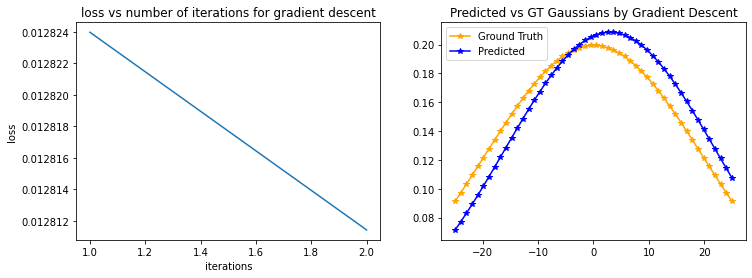

Tolerance reached at epoch: 1
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.99919681  2.9992542  19.12010483] 
Number of iterations: 50000 , learning rate: 0.2 , tolerance: 0.0001


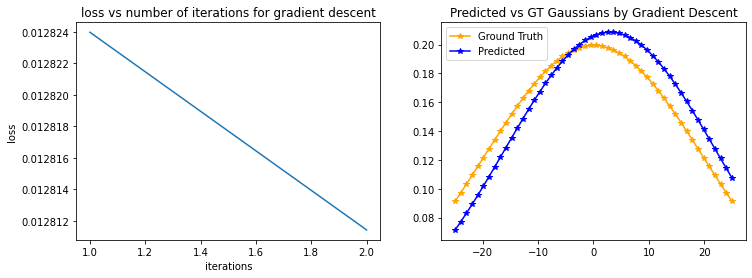

Tolerance reached at epoch: 81
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.94185523  2.94023947 19.12947698] 
Number of iterations: 50000 , learning rate: 0.2 , tolerance: 1e-05


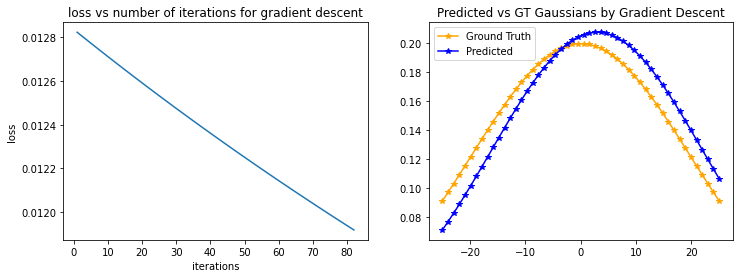

Tolerance reached at epoch: 3460
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.84884681  1.30345715 19.57493056] 
Number of iterations: 50000 , learning rate: 0.2 , tolerance: 1e-06


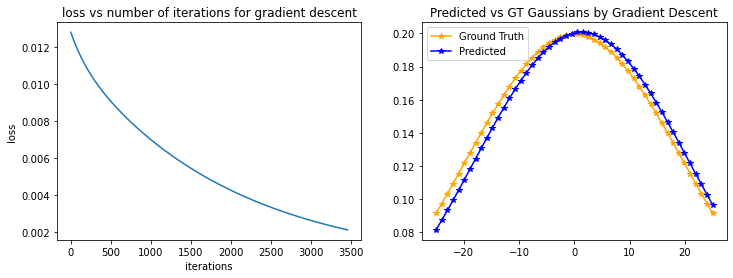

Tolerance reached at epoch: 8323
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.92801197  0.42171026 19.79029103] 
Number of iterations: 50000 , learning rate: 0.2 , tolerance: 1e-07


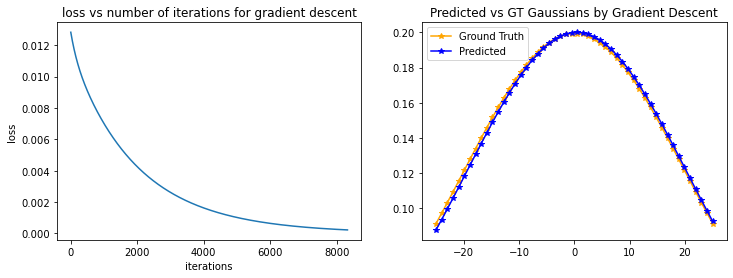

Tolerance reached at epoch: 13535
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.96057278  0.12852892 19.88425033] 
Number of iterations: 50000 , learning rate: 0.2 , tolerance: 1e-08


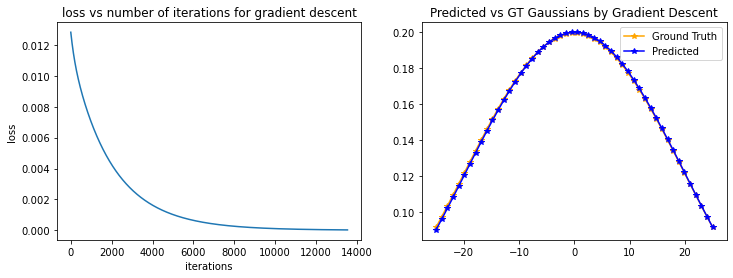

Tolerance reached at epoch: 19391
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.97896231  0.03425102 19.93814421] 
Number of iterations: 50000 , learning rate: 0.2 , tolerance: 1e-09


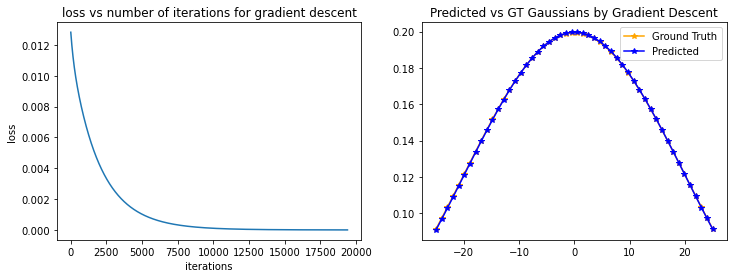

Tolerance reached at epoch: 26982
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99053993e+00 6.22991838e-03 1.99721755e+01] 
Number of iterations: 50000 , learning rate: 0.2 , tolerance: 1e-10


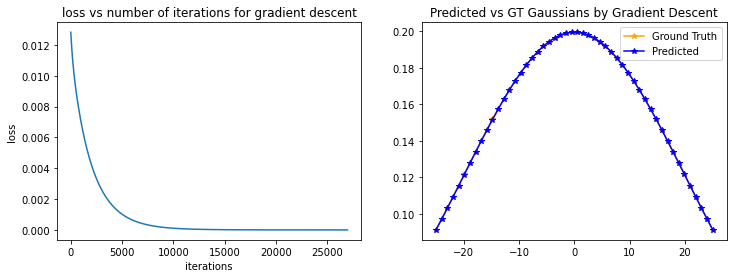

In [147]:
# True params
a, mean, std = 10, 0, 20
true_params = [a, mean, std]

# Initial guess of params
a, mean, std = 10, 3, 19.12
params = [a, mean, std]

# Different tolerances
tol_all = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
for tol_i in tol_all:
    args = get_args(50000, 0.2, tol_i)
    format_output_Gaussian(true_params, params, args)

From the above plots, we can see that with increasing tolerance, the parameters learnt is better. This is because if the tolerance is high, then the optimization converges earlier and hence, doesn't learn well. On the contrary, if the tolerance is low, then the parameters are learnt with more accuracy, as the training converges late with good learning of the parameters.

We can see the same from above plots. Learning rate used is 0.2 and number of iterations given is 50,000. With increasing tolerance, the number of iterations when it convergence increases and hence learns well. We can observe that from the plot "predicted-ground truth" where we can see that with low tolerance, the predicted values are more nearer to the actual values.

### Experimentation with initializations

Tolerance reached at epoch: 23846
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.95286523  0.1853642  19.86178715] 
Number of iterations: 25000 , learning rate: 0.1 , tolerance: 1e-08


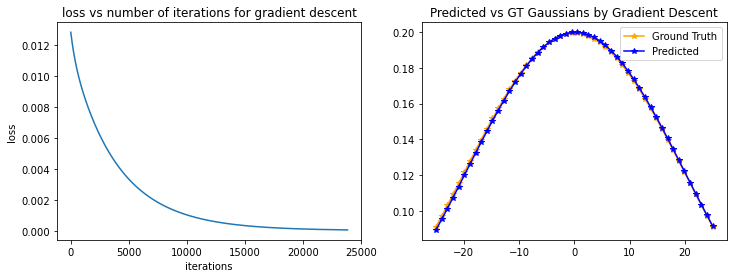

Tolerance reached at epoch: 24880
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [9, 1, 18] 
Params (a, mean, std): [ 9.86439541  0.04307453 19.60198897] 
Number of iterations: 25000 , learning rate: 0.1 , tolerance: 1e-08


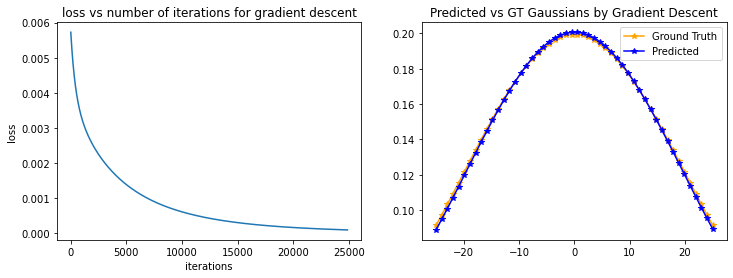

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [-9, 4, 8] 
Params (a, mean, std): [ 9.67269395  0.08090222 19.04297232] 
Number of iterations: 25000 , learning rate: 0.1 , tolerance: 1e-08


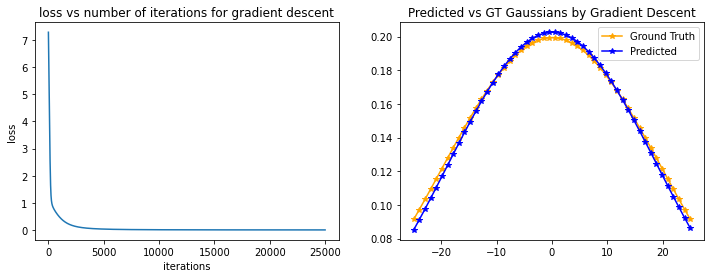

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 10, 20] 
Params (a, mean, std): [10.59196511  1.22918862 21.75876842] 
Number of iterations: 25000 , learning rate: 0.1 , tolerance: 1e-08


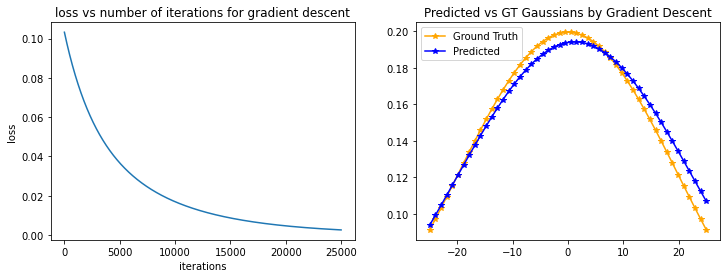

Tolerance reached at epoch: 5096
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [0, 0, 19] 
Params (a, mean, std): [9.96773200e+00 2.62816245e-17 1.99559855e+01] 
Number of iterations: 25000 , learning rate: 0.1 , tolerance: 1e-08


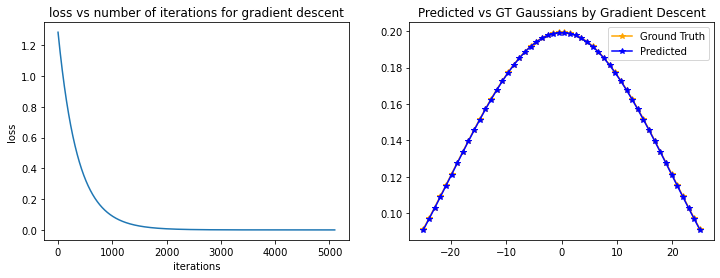

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [-100, 100, -200] 
Params (a, mean, std): [ -96.46522004  100.80912088 -199.59814826] 
Number of iterations: 25000 , learning rate: 0.1 , tolerance: 1e-08


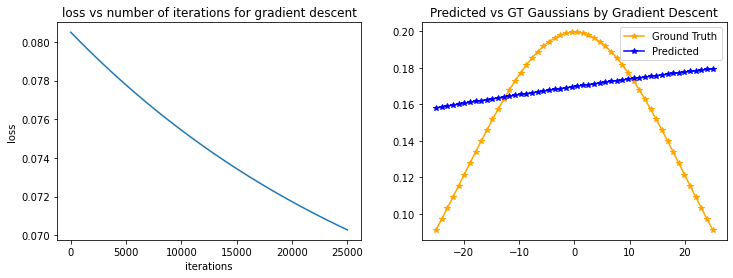

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [100, -100, -200] 
Params (a, mean, std): [  39.78190159 -111.35827833 -193.84399637] 
Number of iterations: 25000 , learning rate: 0.1 , tolerance: 1e-08


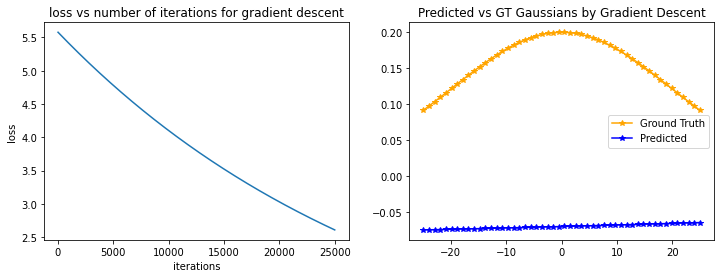

In [160]:
# True params
a, mean, std = 10, 0, 20
true_params = [a, mean, std]

# Initial guess of params
params_all = [[10, 3, 19.12], [9, 1, 18], [-9, 4, 8], [10, 10, 20], [0, 0, 19], [-100, 100, -200], [100, -100, -200]]

for param in params_all:
    args = get_args(25000, 0.1, 1e-8)
    format_output_Gaussian(true_params, param, args)

We can see that for most initializations, the parameters are learnt good and the learning curve also depicts that. For some initializations, it needed a few more number of iterations to converge to the optimal values. However, for some initializations like [-100, 100, -200] and [100, -100, -200], the training didn't converge to the global optimum. It could have found another local optimum to which it could have converged. Hence, the convergence depends on initialization also.

## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:
<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>
Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20,30, num\_obs)$,
where $num\_obs$ is 50.



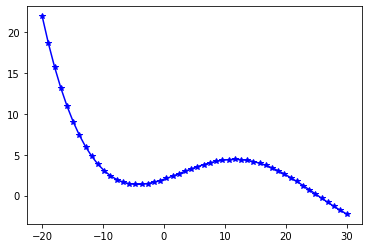

In [253]:
x_obs = np.linspace(-20, 30, 50)
y_obs = make_non_linear(x_obs, 2, 8, 4, 8)

plt.plot(x_obs, y_obs, "-*", color="blue")
plt.show()

In [254]:
# Function to obtain Jacobian of the residual for above non-linear function
def get_non_linear_Jr(x, params):
    p1, p2, p3, p4 = params
    return np.array([
        np.exp(-x/p2),
        p1*np.exp(-x/p2)*x/(p2**2),
        np.sin(x/p4),
        -p3*np.cos(x/p4)*x/(p4**2)
    ])

# Function to compute residual of above non linear function
def get_non_linear_res(x, params, y):
    p1, p2, p3, p4 = params
    return make_non_linear(x, p1, p2, p3, p4) - y

In [268]:
def training_non_linear(x, y, params, args):
    costs = []
    for ep in range(args["num_epochs"]):
        res = get_non_linear_res(x, params, y)
        costs.append(np.linalg.norm(res)**2)
        if (ep != 0) and (abs(costs[-1] - costs[-2]) < args["tol"]):
            print("Tolerance reached at epoch:", ep)
            break
            
        J_r = get_non_linear_Jr(x, params)
        J_F = J_r @ res
        del_k = -args["alpha"]*J_F
        
        params += del_k
        
    return params, costs

In [269]:
def format_output_non_linear(true_params, init_params, args):
    p1, p2, p3, p4 = true_params
    
    # Training and Plotting data
    x_dat = np.linspace(-20, 30, 50)
    y_dat = make_non_linear(x_dat, p1, p2, p3, p4)
    
    # Training
    new_params, costs = training_non_linear(x_dat, y_dat, init_params, args)
    
    # Observed data
    p1, p2, p3, p4 = new_params
    y_obs = make_non_linear(x_dat, p1, p2, p3, p4)

    # Printing
    print("True Params (p1, p2, p3, p4):", true_params, "\nInitial Params (p1, p2, p3, p4):", init_params, "\nParams (p1, p2, p3, p4):", new_params, "\nNumber of iterations:", args['num_epochs'], ", learning rate:", args["alpha"], ", tolerance:", args['tol'])
    
    # Plotting graphs
    plot_graphs(x_dat, y_dat, y_obs, costs)

### Experimentation with number of iterations (epochs)

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [0.64122863 6.9460106  4.94660802 5.94904709] 
Number of iterations: 5 , learning rate: 0.0001 , tolerance: 1e-08


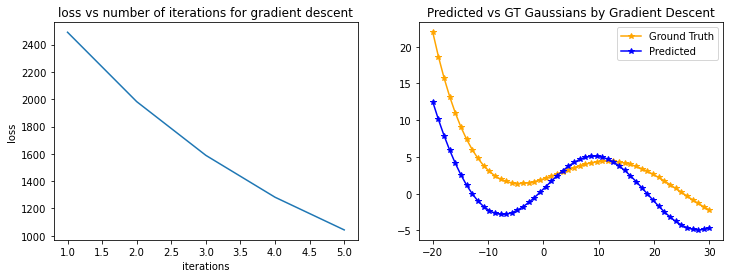

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [0.97000075 6.86405025 4.90563298 5.94887123] 
Number of iterations: 10 , learning rate: 0.0001 , tolerance: 1e-08


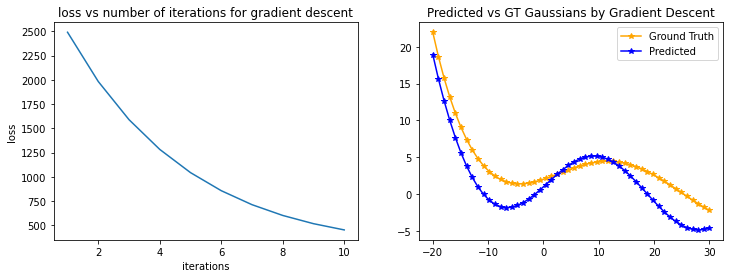

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.23213836 6.79800338 4.8121226  6.06009578] 
Number of iterations: 25 , learning rate: 0.0001 , tolerance: 1e-08


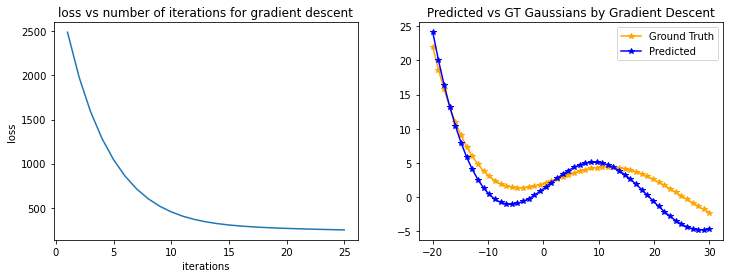

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.29549737 6.83581883 4.68771576 6.28237592] 
Number of iterations: 50 , learning rate: 0.0001 , tolerance: 1e-08


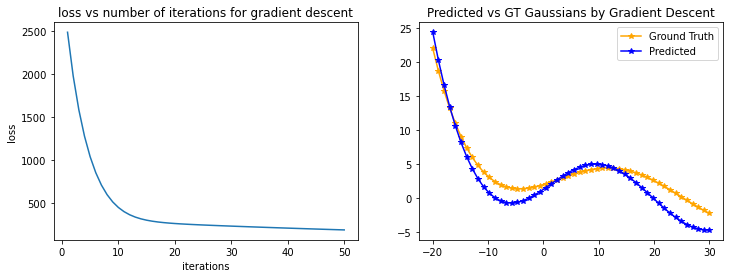

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.33680248 6.87835966 4.58553675 6.4809216 ] 
Number of iterations: 75 , learning rate: 0.0001 , tolerance: 1e-08


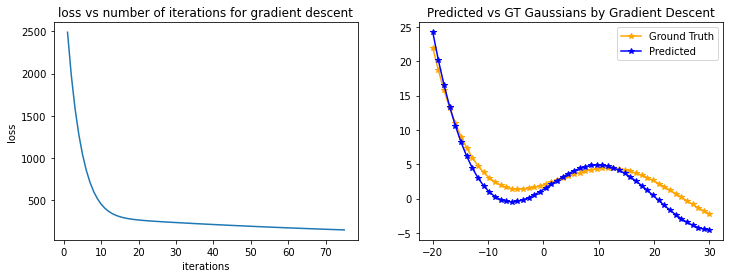

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.3721526  6.91860505 4.50110365 6.65420285] 
Number of iterations: 100 , learning rate: 0.0001 , tolerance: 1e-08


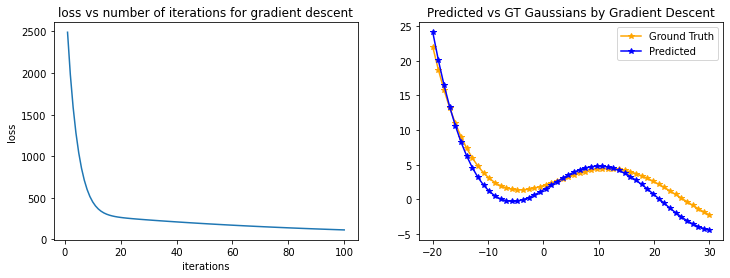

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.42989095 6.9922983  4.37199484 6.93520285] 
Number of iterations: 150 , learning rate: 0.0001 , tolerance: 1e-08


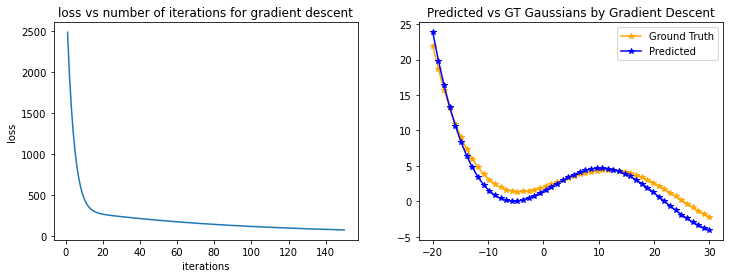

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.4756934  7.05774576 4.27962938 7.14822758] 
Number of iterations: 200 , learning rate: 0.0001 , tolerance: 1e-08


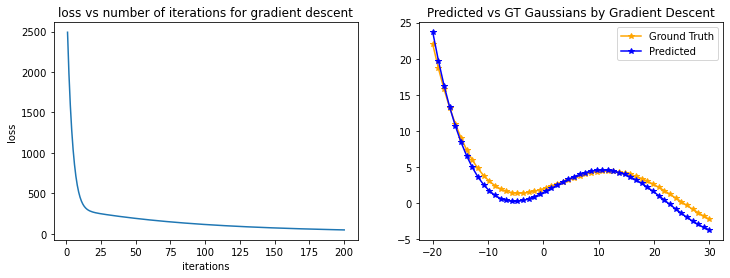

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.51357607 7.11610279 4.21131113 7.31247391] 
Number of iterations: 250 , learning rate: 0.0001 , tolerance: 1e-08


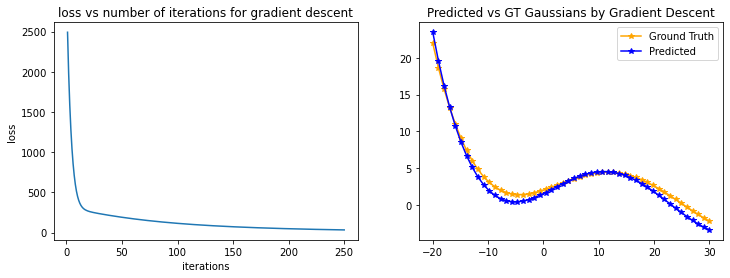

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.64164398 7.33398101 4.04094672 7.75183804] 
Number of iterations: 500 , learning rate: 0.0001 , tolerance: 1e-08


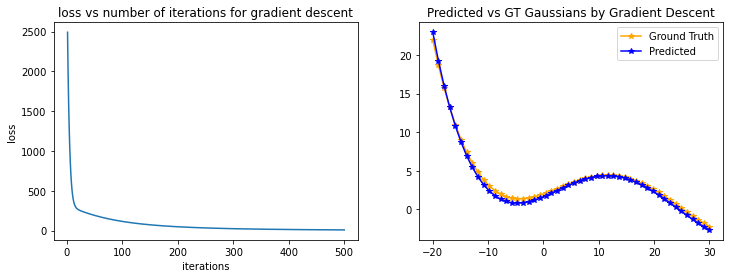

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.77680906 7.58174942 3.96173513 7.991865  ] 
Number of iterations: 1000 , learning rate: 0.0001 , tolerance: 1e-08


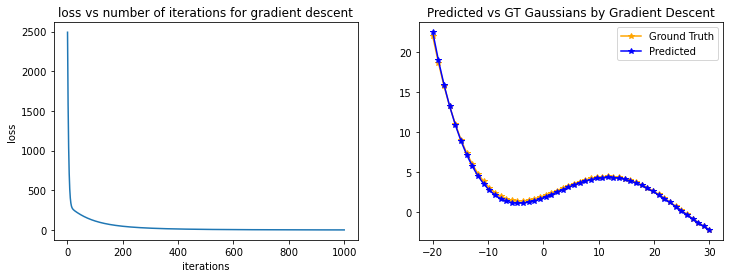

In [287]:
# True params
p1, p2, p3, p4 = 2, 8, 4, 8
true_params = [p1, p2, p3, p4]

# Initial guess of params
p1, p2, p3, p4 = 0, 7, 5, 6
params = [p1, p2, p3, p4]

# Different number of epochs
epochs_all = [5, 10, 25, 50, 75, 100, 150, 200, 250, 500, 1000]
for epoch_i in epochs_all:
    args = get_args(epoch_i, 0.0001, 1e-8)
    format_output_non_linear(true_params, params, args)

We can see from the above results and plots that with increasing number of iterations (or epochs) of training with Gradient Descent method, the parameters are learnt better. This is obvious because the parameters gradually shift towards the local minima using the gradient descent optimization and hence, depending on the learning rate, it requires varying number of iterations to converge to the local minima. In the above experimentation for number of iterations, we have used **learning rate (alpha) as 0.0001**. We have used very low tolerance of 1e-8 so that it is not reached in between the training because we are analysing the parameter "number of iterations".

### Experimentation with learning rate

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.92914577 7.86683486 3.97574463 8.02427826] 
Number of iterations: 25000 , learning rate: 1e-05 , tolerance: 1e-08


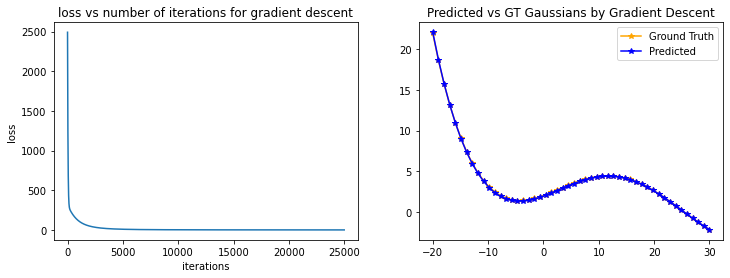

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.99532993 7.99118484 3.99849721 8.00168751] 
Number of iterations: 25000 , learning rate: 2.5e-05 , tolerance: 1e-08


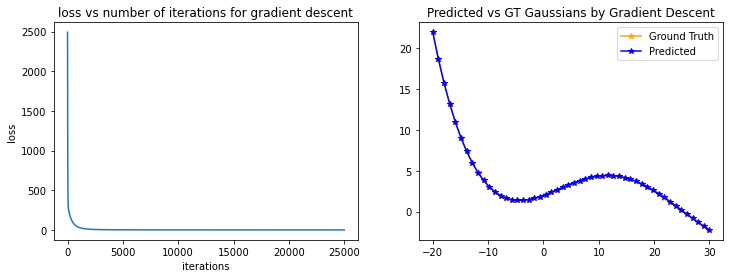

Tolerance reached at epoch: 18036
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.99936572 7.99880199 3.99979885 8.00022952] 
Number of iterations: 25000 , learning rate: 5e-05 , tolerance: 1e-08


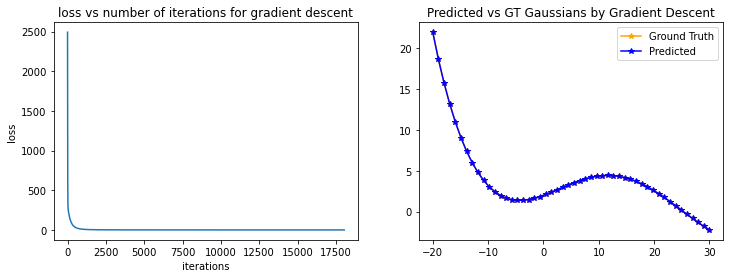

Tolerance reached at epoch: 9488
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.99955176 7.99915335 3.99985796 8.00016222] 
Number of iterations: 25000 , learning rate: 0.0001 , tolerance: 1e-08


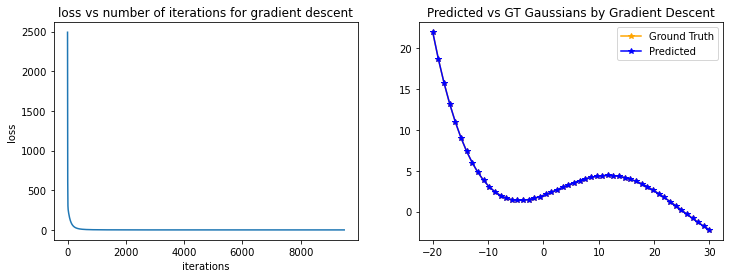

Tolerance reached at epoch: 4971
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.99968309 7.99940139 3.99989964 8.0001147 ] 
Number of iterations: 25000 , learning rate: 0.0002 , tolerance: 1e-08


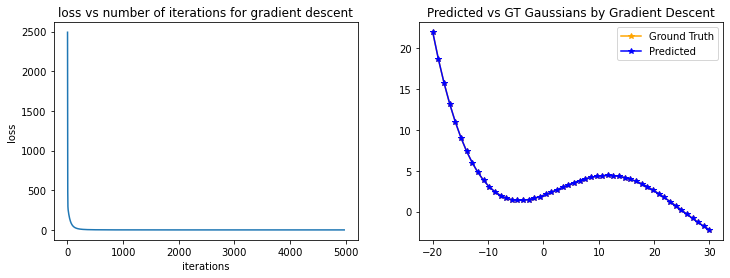

Tolerance reached at epoch: 3398
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.99974171 7.99951212 3.99991822 8.00009348] 
Number of iterations: 25000 , learning rate: 0.0003 , tolerance: 1e-08


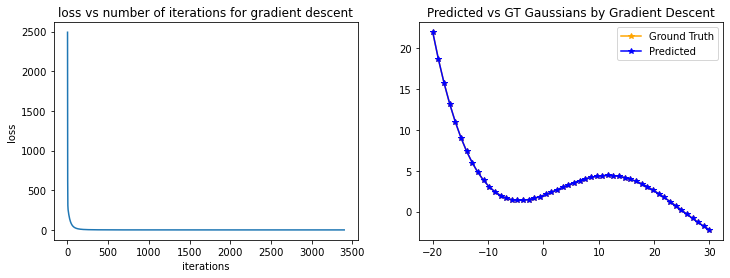

Tolerance reached at epoch: 2094
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.9998005  7.99962317 3.99993685 8.00007221] 
Number of iterations: 25000 , learning rate: 0.0005 , tolerance: 1e-08


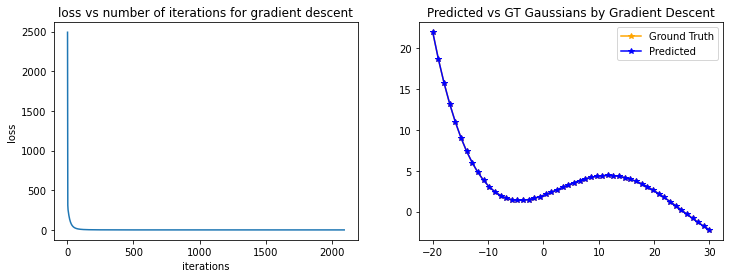

Tolerance reached at epoch: 1043
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.99985894 7.99973355 3.99995536 8.00005106] 
Number of iterations: 25000 , learning rate: 0.001 , tolerance: 1e-08


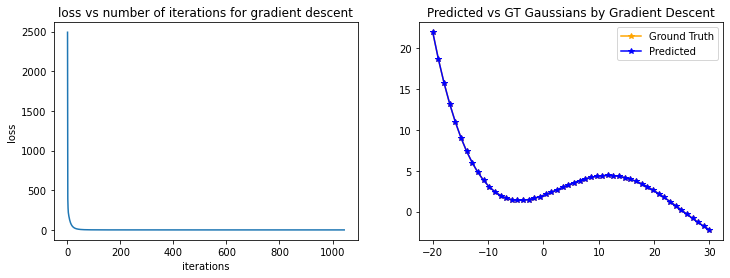

In [289]:
# True params
p1, p2, p3, p4 = 2, 8, 4, 8
true_params = [p1, p2, p3, p4]

# Initial guess of params
p1, p2, p3, p4 = 0, 7, 5, 6
params = [p1, p2, p3, p4]

# Different learning rates
alpha_all = [0.00001, 0.000025, 0.00005, 0.0001, 0.0002, 0.0003, 0.0005, 0.001]
for alpha_i in alpha_all:
    args = get_args(25000, alpha_i, 1e-8)
    format_output_non_linear(true_params, params, args)

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [   5.07158249 1045.8389316   -12.41434854   58.9055279 ] 
Number of iterations: 25000 , learning rate: 0.01 , tolerance: 1e-08


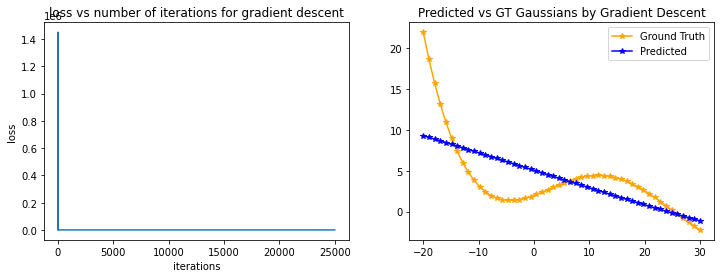

In [297]:
# True params
p1, p2, p3, p4 = 2, 8, 4, 8
true_params = [p1, p2, p3, p4]

# Initial guess of params
p1, p2, p3, p4 = 0, 7, 5, 6
params = [p1, p2, p3, p4]

args = get_args(25000, 0.01, 1e-8)
format_output_non_linear(true_params, params, args)

From the above plots, we can see that with increase in **learning rate (alpha)**, the convergence is faster i.e., it takes less number of iterations (epochs) to converge to the local minimum. As we have given it 25,000 iterations for training, we can see that for learning rates 0.00005 and above, thet start to converge even before 25,000 iterations with tolerance 1e-8. And we can see that the number of iterations when convergence is seen decreases gradually with increasing learning rate (alpha). Hence, with increasing learning rate, convergence is seen earlier and learning is quick.

However, for some learning rates, it can diverge instead of converging. This is because instead of converging to the global optimum, sometimes, it can escape the valley and jump to other local optimum. This could happen sometimes due to large learning rates. Above is an example of that. We can see that with learning rate of 0.01, optimization algorithm doesn't converge even after 25,000 iterations.

### Experimentation with tolerance

Tolerance reached at epoch: 1616
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.86434538 7.74535176 3.95947368 8.03316984] 
Number of iterations: 50000 , learning rate: 0.0001 , tolerance: 0.001


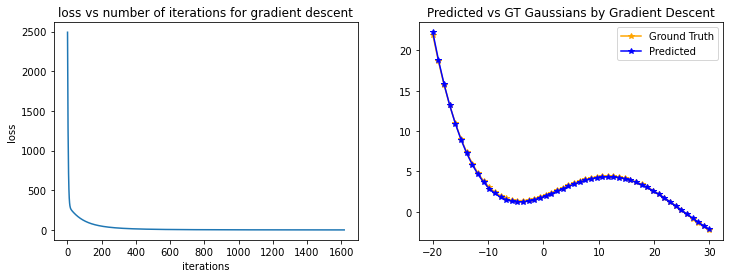

Tolerance reached at epoch: 3118
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.95559465 7.91645477 3.984786   8.01580248] 
Number of iterations: 50000 , learning rate: 0.0001 , tolerance: 0.0001


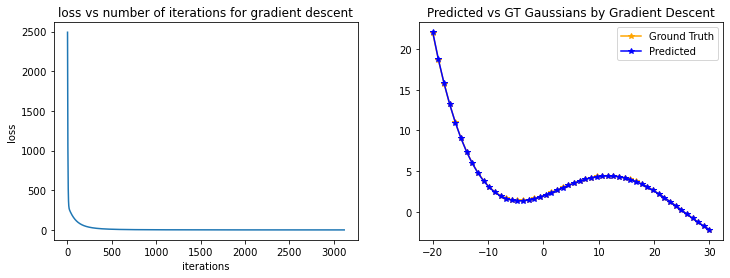

Tolerance reached at epoch: 4697
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.98586629 7.97335104 3.99533673 8.00509717] 
Number of iterations: 50000 , learning rate: 0.0001 , tolerance: 1e-05


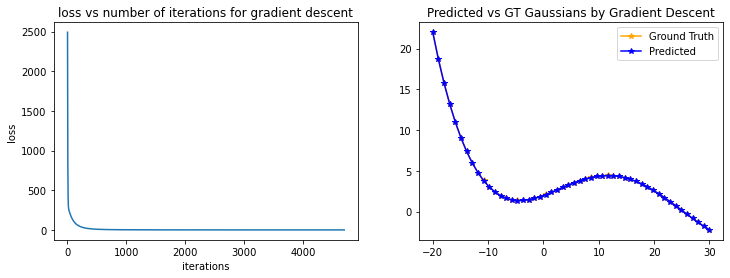

Tolerance reached at epoch: 6290
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.99551991 7.99154321 3.99855929 8.00161897] 
Number of iterations: 50000 , learning rate: 0.0001 , tolerance: 1e-06


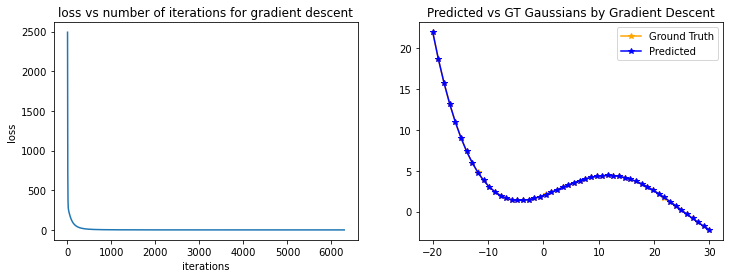

Tolerance reached at epoch: 7888
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.99858233 7.99732271 3.999549   8.00051283] 
Number of iterations: 50000 , learning rate: 0.0001 , tolerance: 1e-07


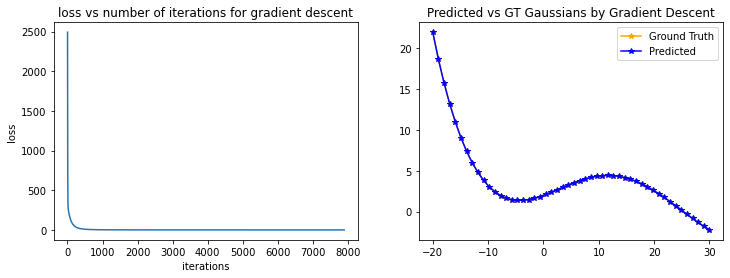

Tolerance reached at epoch: 9488
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.99955176 7.99915335 3.99985796 8.00016222] 
Number of iterations: 50000 , learning rate: 0.0001 , tolerance: 1e-08


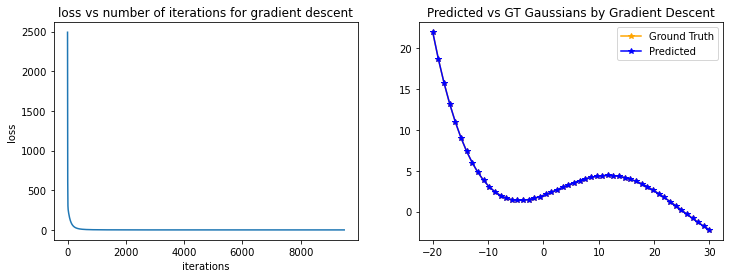

Tolerance reached at epoch: 11088
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.99985824 7.99973223 3.99995514 8.00005131] 
Number of iterations: 50000 , learning rate: 0.0001 , tolerance: 1e-09


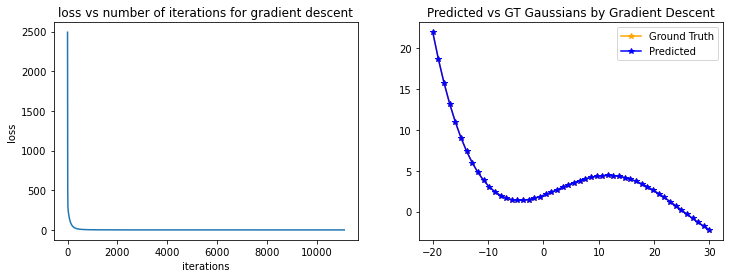

Tolerance reached at epoch: 12688
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 7, 5, 6] 
Params (p1, p2, p3, p4): [1.99995517 7.99991531 3.99998582 8.00001623] 
Number of iterations: 50000 , learning rate: 0.0001 , tolerance: 1e-10


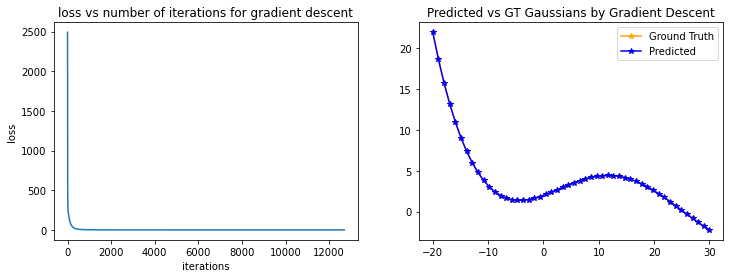

In [291]:
# True params
p1, p2, p3, p4 = 2, 8, 4, 8
true_params = [p1, p2, p3, p4]

# Initial guess of params
p1, p2, p3, p4 = 0, 7, 5, 6
params = [p1, p2, p3, p4]

# Different tolerances
tol_all = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
for tol_i in tol_all:
    args = get_args(50000, 0.0001, tol_i)
    format_output_non_linear(true_params, params, args)

From the above plots, we can see that with increasing tolerance, the parameters learnt is better. However, above we can see that even with high tolerance, the parameters are learnt well. This could be because of higher learning rate. However, we are analysing effect of tolerance on convergence. We can see that with decreasing tolerance, the iteration when convergence is observed increases. This is because when tolerance is low, the optimization algorithm optimizes further until that low tolerance is reached and hence takes more iterations, which in turn learns well. We can see the iterations when convergence observed above.

### Experimentation with initializations

Tolerance reached at epoch: 9892
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [1, 7, 3.5, 8] 
Params (p1, p2, p3, p4): [1.99955177 7.99915338 3.99985794 8.00016221] 
Number of iterations: 25000 , learning rate: 0.0001 , tolerance: 1e-08


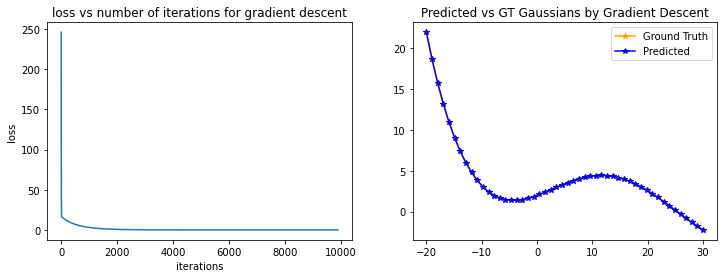

Tolerance reached at epoch: 6879
True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [0, 1.5, 2, 7] 
Params (p1, p2, p3, p4): [ 4.16199383e+00  2.74102137e+15 -2.86377367e+04  1.06518232e+06] 
Number of iterations: 25000 , learning rate: 0.0001 , tolerance: 1e-08


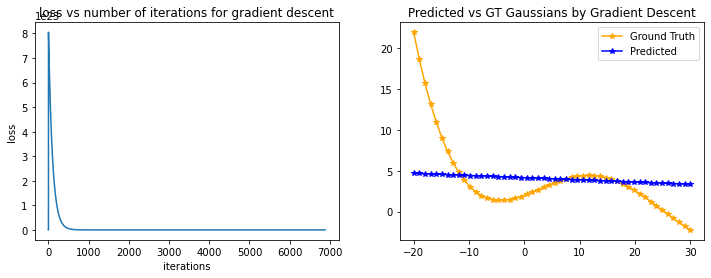

True Params (p1, p2, p3, p4): [2, 8, 4, 8] 
Initial Params (p1, p2, p3, p4): [-2, -4, -8, -4] 
Params (p1, p2, p3, p4): [    6.1247283  -5813.9264851    -69.42090029   165.78795507] 
Number of iterations: 25000 , learning rate: 0.0001 , tolerance: 1e-08


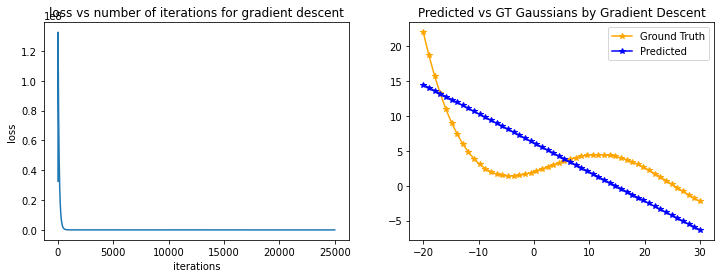

In [298]:
# True params
p1, p2, p3, p4 = 2, 8, 4, 8
true_params = [p1, p2, p3, p4]

# Initial guess of params
params_all = [[1, 7, 3.5, 8], [0, 1.5, 2, 7], [-2, -4, -8, -4]]

for param in params_all:
    args = get_args(25000, 0.0001, 1e-8)
    format_output_non_linear(true_params, param, args)

We can see that for most initializations, the parameters are learnt good and the learning curve also depicts that. For some initializations, it needed a few more number of iterations to converge to the optimal values. However, for some initializations like [0, 1.5, 2, 7] and [-2, -4, -8, -4], the training didn't converge to the global optimum. It could have found another local optimum to which it could have converged. Hence, the convergence depends on initialization also.

## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent. Gauss Newton updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

Levenberg Marquardt lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

**Questions**
   * 1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.
   * 2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

# Gauss - Newton Method

In [186]:
def training_Gaussian_GN(x, y, params, args):
    costs = []
    for ep in range(args["num_epochs"]):
        res = get_Gaussian_res(x, params, y)
        costs.append(np.linalg.norm(res)**2)
        if (ep != 0) and (abs(costs[-1] - costs[-2]) < args["tol"]):
            print("Tolerance reached at epoch:", ep)
            break
            
        J_r = get_Gaussian_Jr(x, params)
        J_F = np.linalg.inv(J_r @ J_r.T) @ J_r @ res
        del_k = -args["alpha"]*J_F
        
        params += del_k
        
    return params, costs

In [187]:
def format_output_Gaussian_GN(true_params, init_params, args):
    a, mean, std = true_params
    
    # Training and Plotting data
    x_dat = np.linspace(-25, 25, 50)
    y_dat = make_gaussian(x_dat, a, mean, std)
    
    # Training
    new_params, costs = training_Gaussian_GN(x_dat, y_dat, init_params, args)
    
    # Observed data
    a, mean, std = new_params
    y_obs = make_gaussian(x_dat, a, mean, std)

    # Printing
    print("True Params (a, mean, std):", true_params, "\nInitial Params (a, mean, std):", init_params, "\nParams (a, mean, std):", new_params, "\nNumber of iterations:", args['num_epochs'], ", learning rate:", args["alpha"], ", tolerance:", args['tol'])
    
    # Plotting graphs
    plot_graphs(x_dat, y_dat, y_obs, costs)

### Experimentation with number of iterations

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.95003922  2.73918268 19.21859054] 
Number of iterations: 10 , learning rate: 0.01 , tolerance: 1e-08


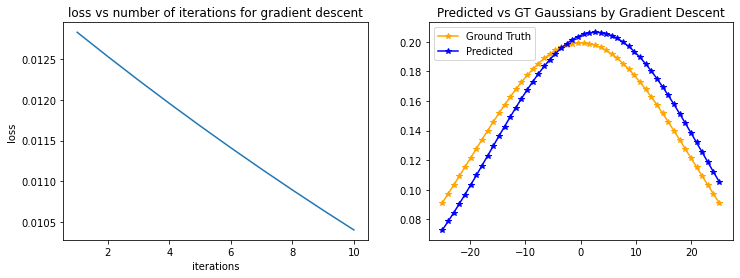

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.89503175  2.3831789  19.34574555] 
Number of iterations: 25 , learning rate: 0.01 , tolerance: 1e-08


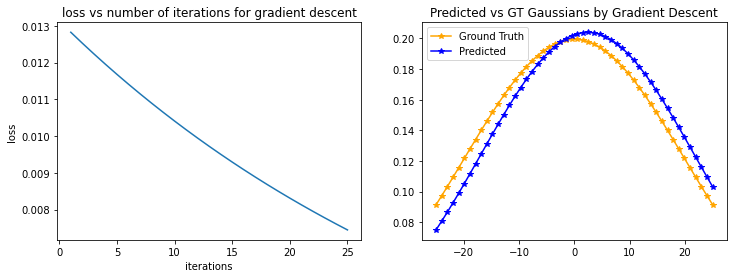

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.84265086  1.87867992 19.51195619] 
Number of iterations: 50 , learning rate: 0.01 , tolerance: 1e-08


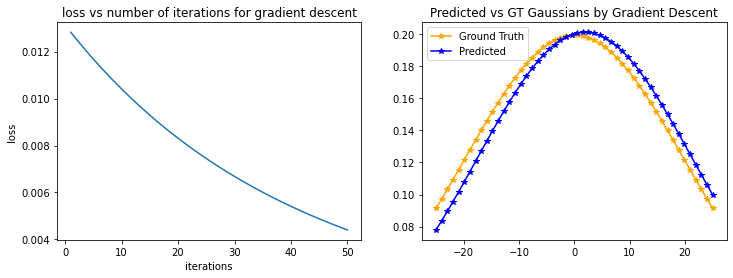

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.82189735  1.15147418 19.72438349] 
Number of iterations: 100 , learning rate: 0.01 , tolerance: 1e-08


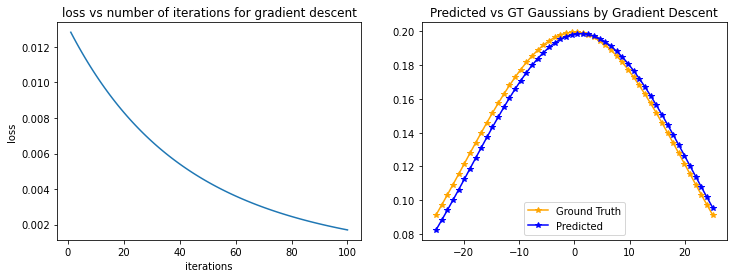

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.88218033  0.42312808 19.90702429] 
Number of iterations: 200 , learning rate: 0.01 , tolerance: 1e-08


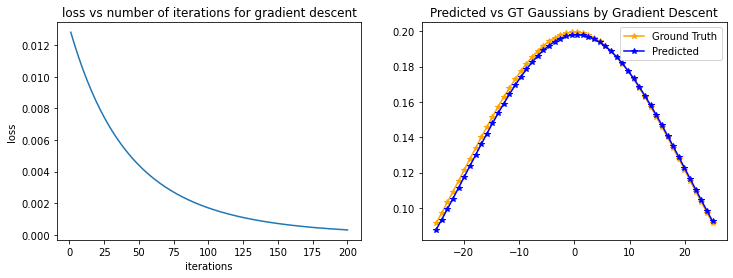

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.91412811  0.25572757 19.94493599] 
Number of iterations: 250 , learning rate: 0.01 , tolerance: 1e-08


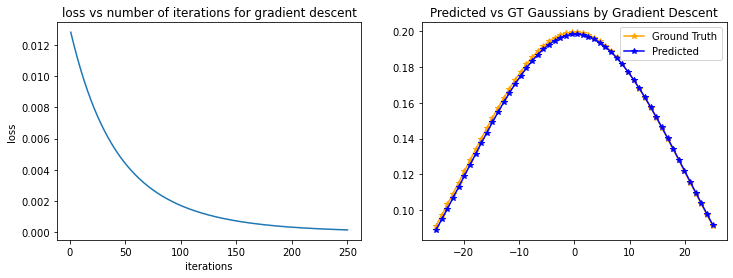

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.93949612  0.15452182 19.9671375 ] 
Number of iterations: 300 , learning rate: 0.01 , tolerance: 1e-08


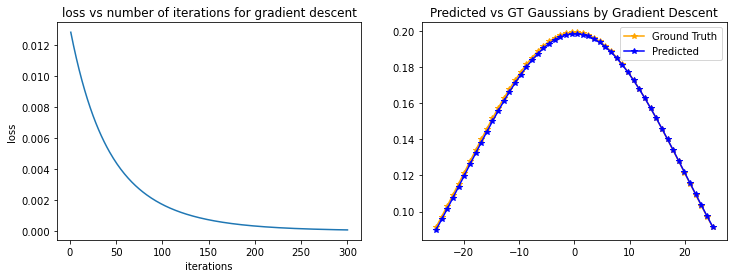

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.97175686  0.05644662 19.98813973] 
Number of iterations: 400 , learning rate: 0.01 , tolerance: 1e-08


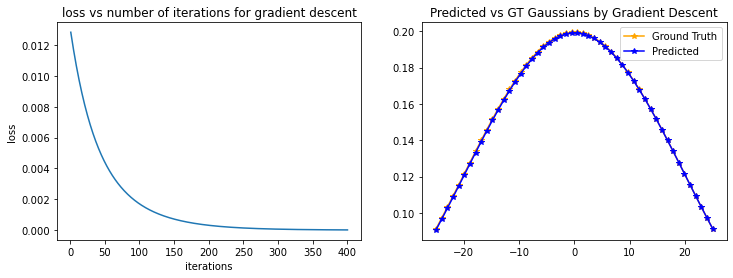

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.98746713  0.02063794 19.99568288] 
Number of iterations: 500 , learning rate: 0.01 , tolerance: 1e-08


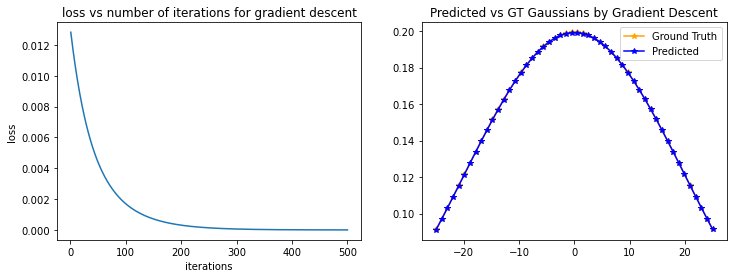

Tolerance reached at epoch: 575
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99333208e+00 9.70753889e-03 1.99979721e+01] 
Number of iterations: 1000 , learning rate: 0.01 , tolerance: 1e-08


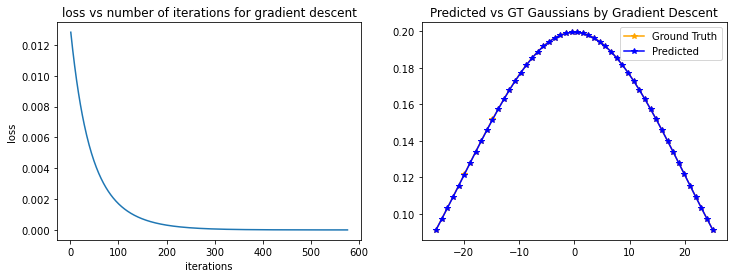

In [191]:
# True params
a, mean, std = 10, 0, 20
true_params = [a, mean, std]

# Initial guess of params
a, mean, std = 10, 3, 19.12
params = [a, mean, std]

# Different number of epochs
epochs_all = [10, 25, 50, 100, 200, 250, 300, 400, 500, 1000]
for epoch_i in epochs_all:
    args = get_args(epoch_i, 0.01, 1e-8)
    format_output_Gaussian_GN(true_params, params, args)

We can see from the above results and plots that with increasing number of iterations (or epochs) of training with Gauss-Newton method, the parameters are learnt better. This is obvious because the parameters gradually shift towards the local minima using the Gauss-Newton optimization and hence, depending on the learning rate, it requires varying number of iterations to converge to the local minima. In the above experimentation for number of iterations, we have used **learning rate (alpha) as 0.01**. because the convergence was faster then Gradient Descent method. We have used very low tolerance of 1e-8 so that it is not reached in between the training because we are analysing the parameter "number of iterations", however we see that it converges at 575 iteration.

### Experimentation with learning rate (alpha)

Tolerance reached at epoch: 575
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99333208e+00 9.70753889e-03 1.99979721e+01] 
Number of iterations: 25000 , learning rate: 0.01 , tolerance: 1e-08


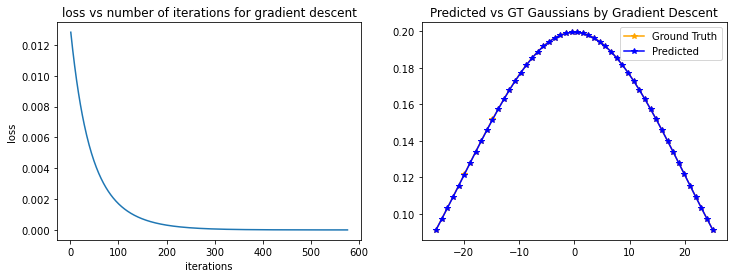

Tolerance reached at epoch: 132
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99711861e+00 3.60546838e-03 1.99992601e+01] 
Number of iterations: 25000 , learning rate: 0.05 , tolerance: 1e-08


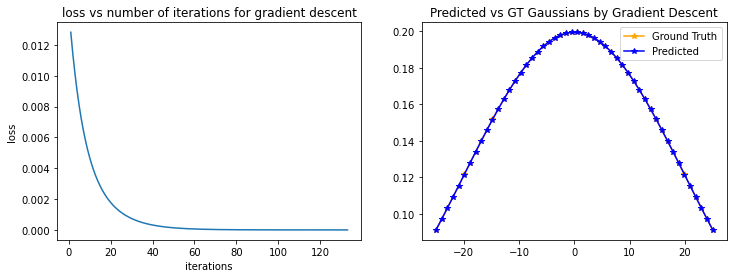

Tolerance reached at epoch: 91
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99781103e+00 2.61086287e-03 1.99994705e+01] 
Number of iterations: 25000 , learning rate: 0.075 , tolerance: 1e-08


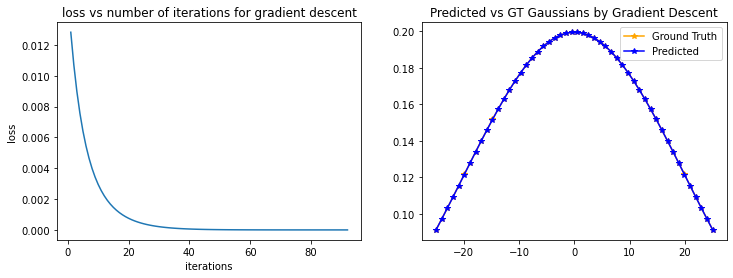

Tolerance reached at epoch: 69
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99810920e+00 2.19328938e-03 1.99995606e+01] 
Number of iterations: 25000 , learning rate: 0.1 , tolerance: 1e-08


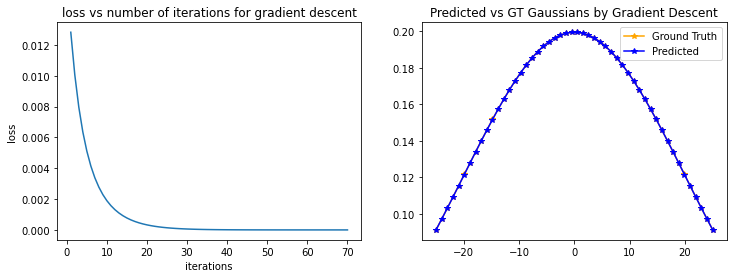

Tolerance reached at epoch: 35
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99879273e+00 1.28434566e-03 1.99997574e+01] 
Number of iterations: 25000 , learning rate: 0.2 , tolerance: 1e-08


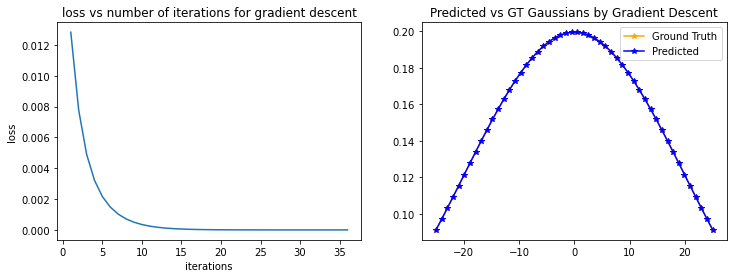

Tolerance reached at epoch: 28
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99901626e+00 1.00811611e-03 1.99998164e+01] 
Number of iterations: 25000 , learning rate: 0.25 , tolerance: 1e-08


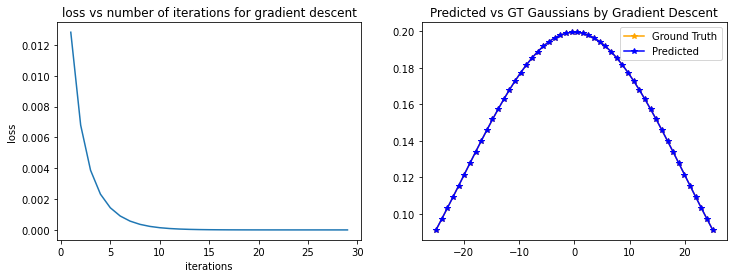

Tolerance reached at epoch: 17
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99942254e+00 5.43371171e-04 1.99999155e+01] 
Number of iterations: 25000 , learning rate: 0.4 , tolerance: 1e-08


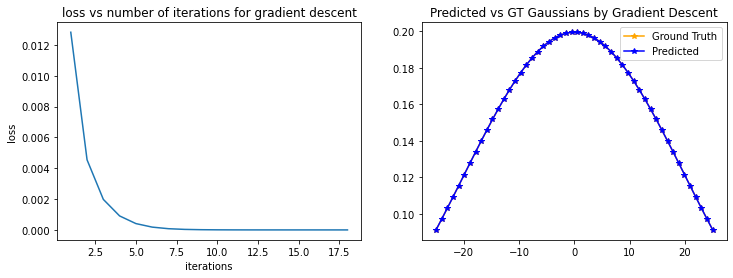

Tolerance reached at epoch: 13
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99956872e+00 3.95665847e-04 1.99999486e+01] 
Number of iterations: 25000 , learning rate: 0.5 , tolerance: 1e-08


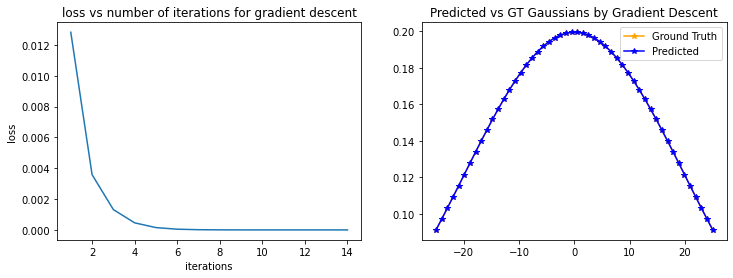

In [192]:
# True params
a, mean, std = 10, 0, 20
true_params = [a, mean, std]

# Initial guess of params
a, mean, std = 10, 3, 19.12
params = [a, mean, std]

# Different learning rates
alpha_all = [0.01, 0.05, 0.075, 0.1, 0.2, 0.25, 0.4, 0.5]
for alpha_i in alpha_all:
    args = get_args(25000, alpha_i, 1e-8)
    format_output_Gaussian_GN(true_params, params, args)

From the above plots, we can see that with increase in **learning rate (alpha)**, the convergence is faster i.e., it takes less number of iterations (epochs) to converge to the local minimum. We have given it 25,000 iterations for training, but however, they start converging ven before that. We can see that with 0.01 learning rate too, it converges at 575 iteration with tolerance 1e-8. And we can see that the number of iterations when convergence is seen decreases gradually with increasing learning rate (alpha). Comparatively, this method converges quicker than Gradient Descent.

### Experimentation with tolerance

Tolerance reached at epoch: 1
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.99445344  2.97306132 19.13040147] 
Number of iterations: 1000 , learning rate: 0.01 , tolerance: 0.001


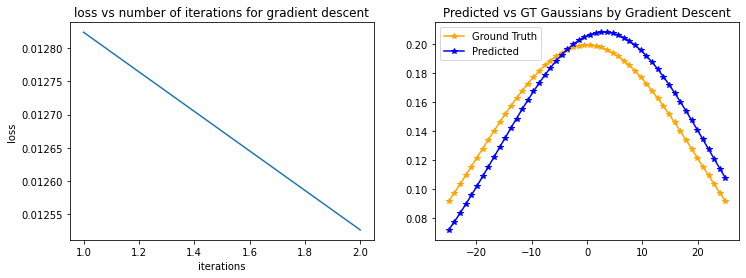

Tolerance reached at epoch: 45
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.85000513  1.97116734 19.4826756 ] 
Number of iterations: 1000 , learning rate: 0.01 , tolerance: 0.0001


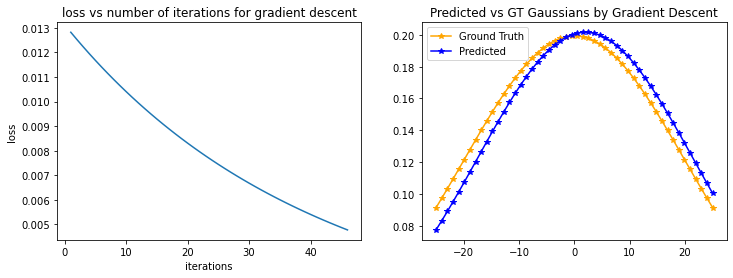

Tolerance reached at epoch: 161
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.85468427  0.62622759 19.85901527] 
Number of iterations: 1000 , learning rate: 0.01 , tolerance: 1e-05


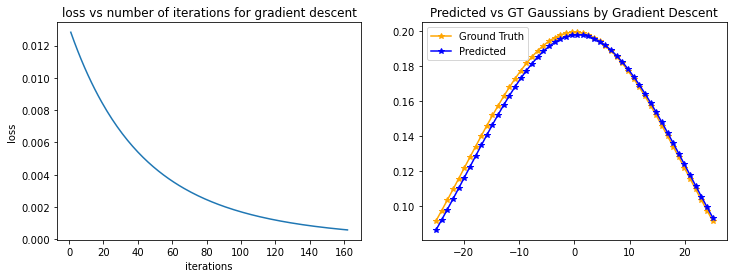

Tolerance reached at epoch: 299
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.93905575  0.15608646 19.96679836] 
Number of iterations: 1000 , learning rate: 0.01 , tolerance: 1e-06


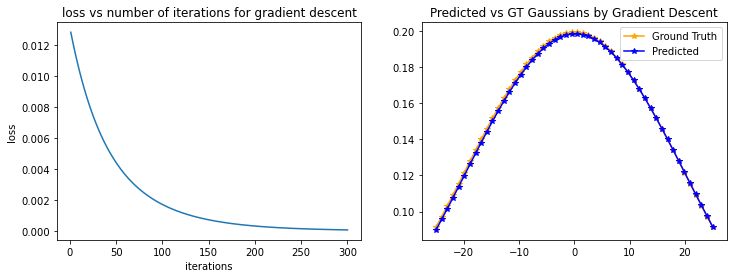

Tolerance reached at epoch: 439
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.97933013  0.03812235 19.9920081 ] 
Number of iterations: 1000 , learning rate: 0.01 , tolerance: 1e-07


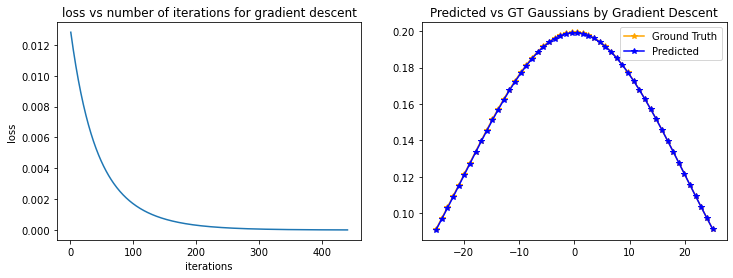

Tolerance reached at epoch: 575
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99333208e+00 9.70753889e-03 1.99979721e+01] 
Number of iterations: 1000 , learning rate: 0.01 , tolerance: 1e-08


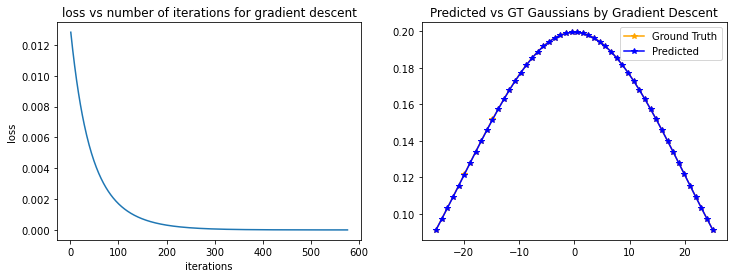

Tolerance reached at epoch: 708
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99789043e+00 2.54935150e-03 1.99994679e+01] 
Number of iterations: 1000 , learning rate: 0.01 , tolerance: 1e-09


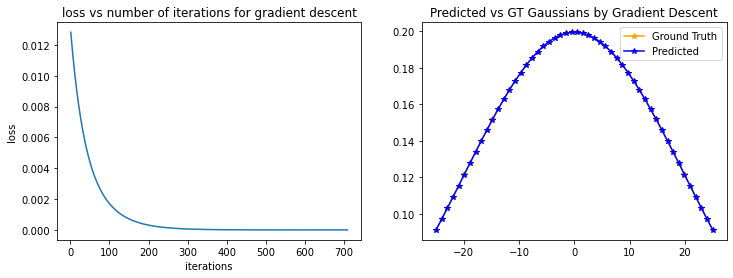

Tolerance reached at epoch: 838
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99933424e+00 6.90163505e-04 1.99998560e+01] 
Number of iterations: 1000 , learning rate: 0.01 , tolerance: 1e-10


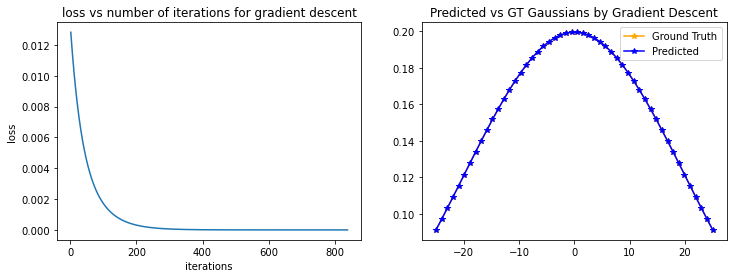

In [196]:
# True params
a, mean, std = 10, 0, 20
true_params = [a, mean, std]

# Initial guess of params
a, mean, std = 10, 3, 19.12
params = [a, mean, std]

# Different tolerances
tol_all = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
for tol_i in tol_all:
    args = get_args(1000, 0.01, tol_i)
    format_output_Gaussian_GN(true_params, params, args)

From the above plots, we can see that with increasing tolerance, the parameters learnt is better. This is because if the tolerance is high, then the optimization converges earlier and hence, doesn't learn well. On the contrary, if the tolerance is low, then the parameters are learnt with more accuracy, as the training converges late with good learning of the parameters.

We can see the same from above plots. Learning rate used is 0.01 because Gauss-Newton method converges quicker than Gradient Descent and number of iterations given to train is 1,000. With increasing tolerance, the number of iterations when it convergence increases and hence learns well. We can observe that from the plot "predicted-ground truth" where we can see that with low tolerance, the predicted values are more nearer to the actual values.

### Experimentation with initializations

Tolerance reached at epoch: 4397
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.97918062  0.0386035  19.99187777] 
Number of iterations: 10000 , learning rate: 0.001 , tolerance: 1e-08


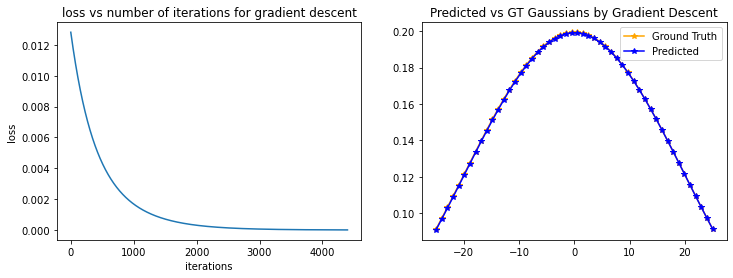

Tolerance reached at epoch: 5626
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [9, 1, 18] 
Params (a, mean, std): [9.97626358e+00 3.65268494e-03 1.99930246e+01] 
Number of iterations: 10000 , learning rate: 0.001 , tolerance: 1e-08


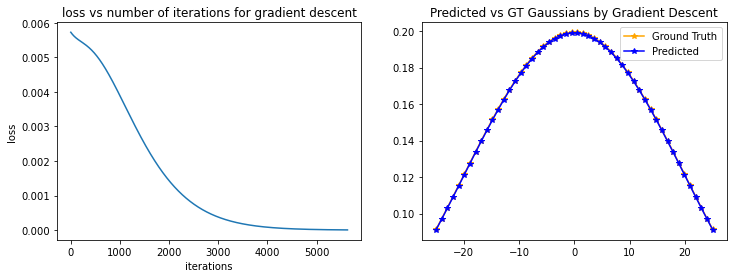

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [-9, 4, 8] 
Params (a, mean, std): [ -9.88119288   0.02179871 -19.97193415] 
Number of iterations: 10000 , learning rate: 0.001 , tolerance: 1e-08


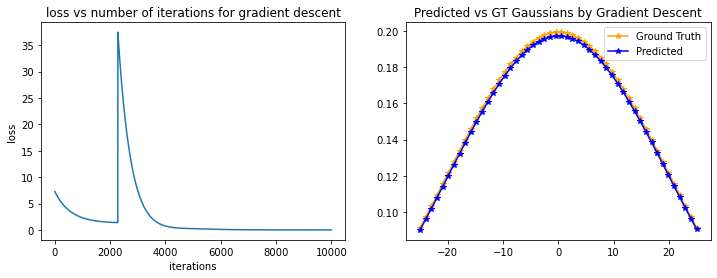

Tolerance reached at epoch: 5207
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 10, 20] 
Params (a, mean, std): [10.02043066  0.04975659 20.01236857] 
Number of iterations: 10000 , learning rate: 0.001 , tolerance: 1e-08


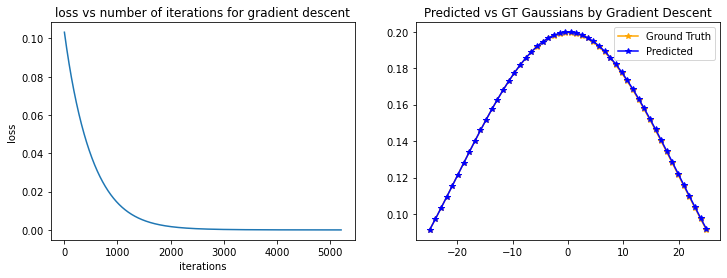

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [-100, 100, -200] 
Params (a, mean, std): [-1.00251150e+01  6.06511327e-04 -2.00054957e+01] 
Number of iterations: 10000 , learning rate: 0.001 , tolerance: 1e-08


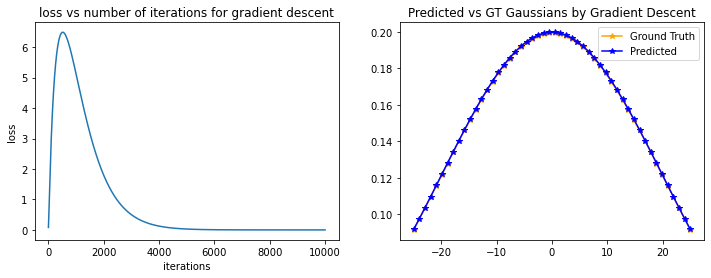

Tolerance reached at epoch: 14
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [100, -100, -200] 
Params (a, mean, std): [ 5.44998003e+24 -1.53712381e+22 -1.66322453e+21] 
Number of iterations: 10000 , learning rate: 0.001 , tolerance: 1e-08


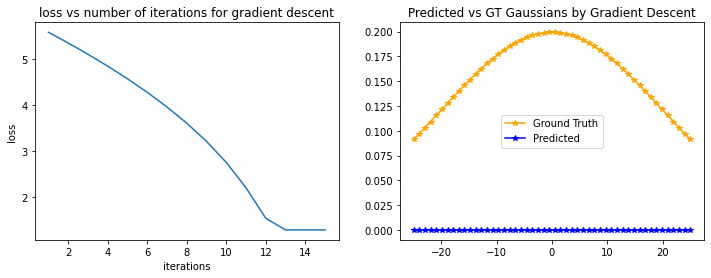

In [199]:
# True params
a, mean, std = 10, 0, 20
true_params = [a, mean, std]

# Initial guess of params
params_all = [[10, 3, 19.12], [9, 1, 18], [-9, 4, 8], [10, 10, 20], [-100, 100, -200], [100, -100, -200]]

for param in params_all:
    args = get_args(10000, 0.001, 1e-8)
    format_output_Gaussian_GN(true_params, param, args)

We can see that for most initializations, the parameters are learnt good and the learning curve also depicts that. However, for some initializations, the cost vs iterations plot have few spikes in cost. But however, they learnt the parameters well.

However, for some initializations like [100, -100, -200], the training didn't converge to the global optimum. It could have found another local optimum to which it could have converged. Hence, the convergence depends on initialization also.

# LM Method

In [215]:
def training_Gaussian_LM(x, y, params, args):
    costs = []
    for ep in range(args["num_epochs"]):
        res = get_Gaussian_res(x, params, y)
        costs.append(np.linalg.norm(res)**2)
        if (ep != 0) and (abs(costs[-1] - costs[-2]) < args["tol"]):
            print("Tolerance reached at epoch:", ep)
            break
            
        J_r = get_Gaussian_Jr(x, params)
        J_F = np.linalg.inv(J_r @ J_r.T + args['lamda'] * np.identity(len(params))) @ J_r @ res
        del_k = -args["alpha"]*J_F
        
        params += del_k
        
    return params, costs

# Function to get args dictionary
def get_args_LM(num_epochs, alpha, tol, lamda):
    return {
        "num_epochs": num_epochs,
        "alpha": alpha,
        "tol": tol,
        "lamda": lamda
    }

In [216]:
def format_output_Gaussian_LM(true_params, init_params, args):
    a, mean, std = true_params
    
    # Training and Plotting data
    x_dat = np.linspace(-25, 25, 50)
    y_dat = make_gaussian(x_dat, a, mean, std)
    
    # Training
    new_params, costs = training_Gaussian_LM(x_dat, y_dat, init_params, args)
    
    # Observed data
    a, mean, std = new_params
    y_obs = make_gaussian(x_dat, a, mean, std)

    # Printing
    print("True Params (a, mean, std):", true_params, "\nInitial Params (a, mean, std):", init_params, "\nParams (a, mean, std):", new_params, "\nNumber of iterations:", args['num_epochs'], ", learning rate:", args["alpha"], ", tolerance:", args['tol'])
    
    # Plotting graphs
    plot_graphs(x_dat, y_dat, y_obs, costs)

### Experimentation with number of iterations

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.8682495   2.82160509 19.15559867] 
Number of iterations: 50 , learning rate: 0.1 , tolerance: 1e-08


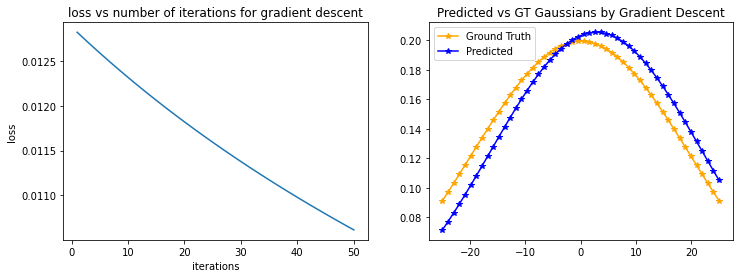

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.80225382  2.65488509 19.1976166 ] 
Number of iterations: 100 , learning rate: 0.1 , tolerance: 1e-08


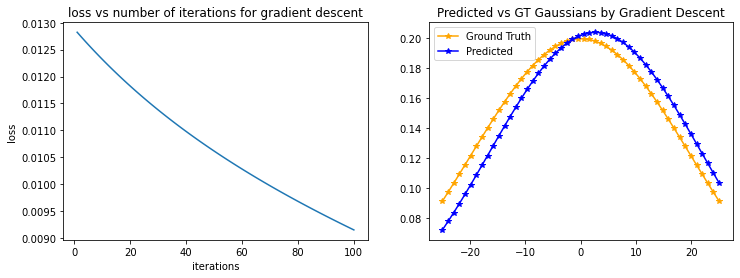

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.76475854  2.2159474  19.32397193] 
Number of iterations: 250 , learning rate: 0.1 , tolerance: 1e-08


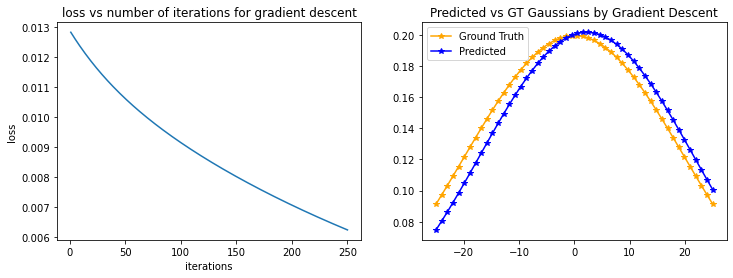

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.81178319  1.64770261 19.48557143] 
Number of iterations: 500 , learning rate: 0.1 , tolerance: 1e-08


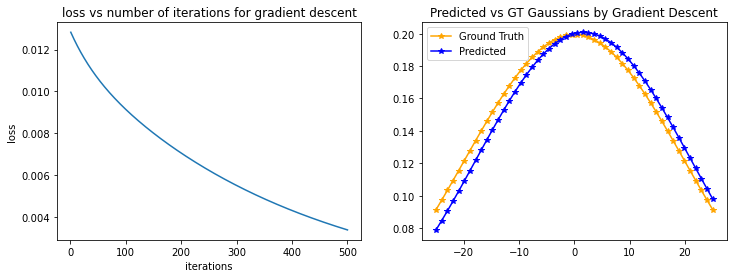

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.88250388  0.92145173 19.66876218] 
Number of iterations: 1000 , learning rate: 0.1 , tolerance: 1e-08


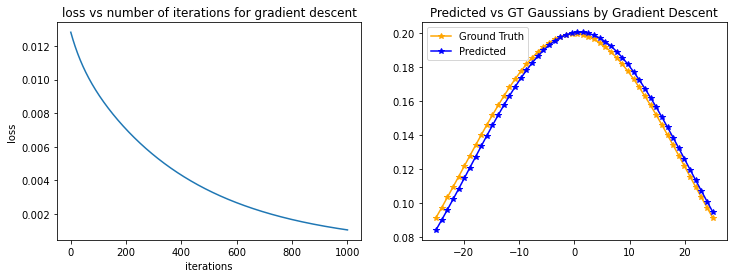

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.91851798  0.51992593 19.76595695] 
Number of iterations: 1500 , learning rate: 0.1 , tolerance: 1e-08


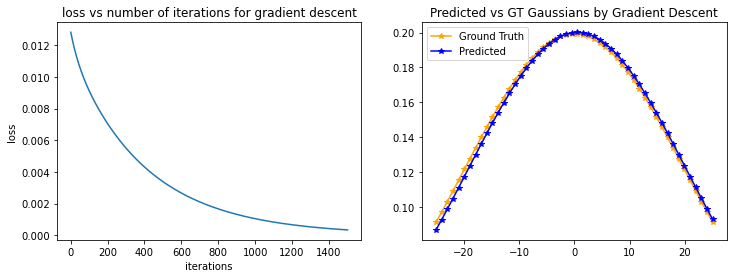

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.94026852  0.29495254 19.82695595] 
Number of iterations: 2000 , learning rate: 0.1 , tolerance: 1e-08


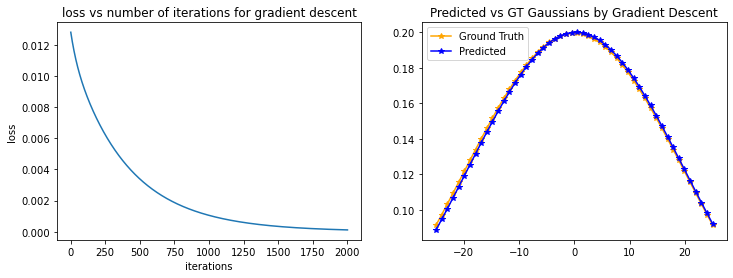

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.95506912  0.16793984 19.86933649] 
Number of iterations: 2500 , learning rate: 0.1 , tolerance: 1e-08


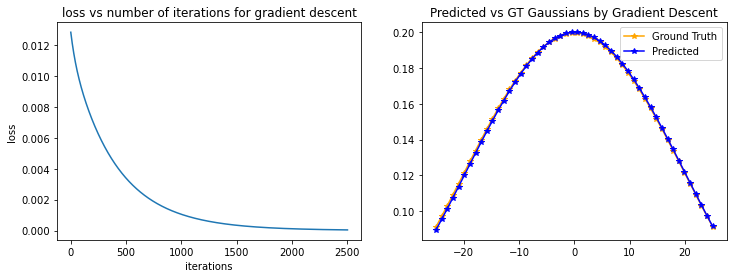

Tolerance reached at epoch: 3536
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.97431255  0.05268336 19.92510784] 
Number of iterations: 5000 , learning rate: 0.1 , tolerance: 1e-08


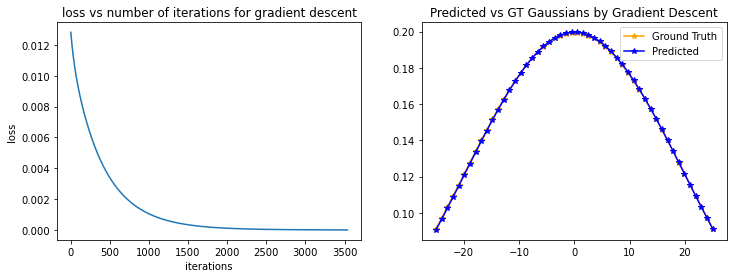

In [217]:
# True params
a, mean, std = 10, 0, 20
true_params = [a, mean, std]

# Initial guess of params
a, mean, std = 10, 3, 19.12
params = [a, mean, std]

# Different number of epochs
epochs_all = [50, 100, 250, 500, 1000, 1500, 2000, 2500, 5000]
for epoch_i in epochs_all:
    args = get_args_LM(epoch_i, 0.1, 1e-8, 0.1)
    format_output_Gaussian_LM(true_params, params, args)

We can see from the above results and plots that with increasing number of iterations (or epochs) of training with LM method, the parameters are learnt better. This is obvious because the parameters gradually shift towards the local minima using the LM optimization and hence, depending on the learning rate, it requires varying number of iterations to converge to the local minima. In the above experimentation for number of iterations, we have used **learning rate (alpha) as 0.1**. We have used very low tolerance of 1e-8 so that it is not reached in between the training because we are analysing the parameter "number of iterations", however we see that it converges at 3536 iteration.

### Experimentation with learning rate (alpha)

True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.88445101  0.91156862 19.67048698] 
Number of iterations: 50000 , learning rate: 0.01 , tolerance: 1e-08


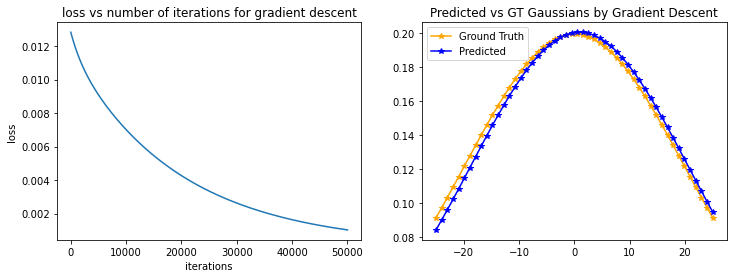

Tolerance reached at epoch: 23893
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.95282571  0.18558913 19.86191435] 
Number of iterations: 50000 , learning rate: 0.05 , tolerance: 1e-08


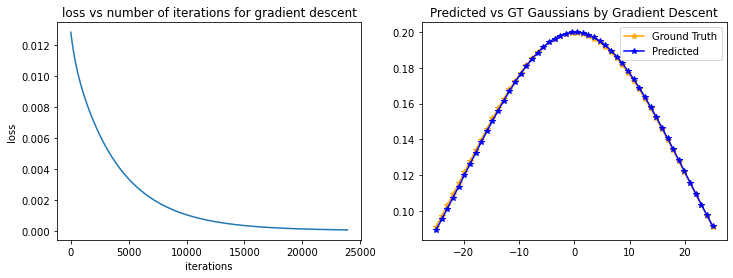

Tolerance reached at epoch: 17181
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.95750506  0.14998909 19.87551189] 
Number of iterations: 50000 , learning rate: 0.075 , tolerance: 1e-08


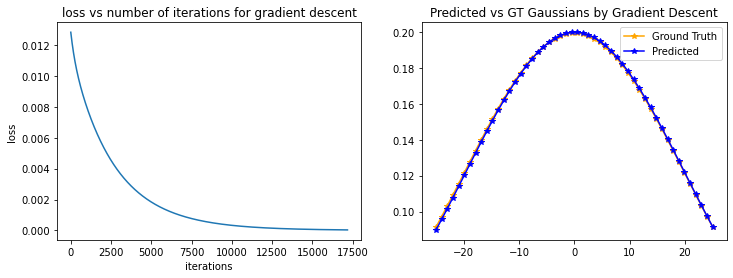

Tolerance reached at epoch: 13561
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.96054615  0.12872052 19.88436958] 
Number of iterations: 50000 , learning rate: 0.1 , tolerance: 1e-08


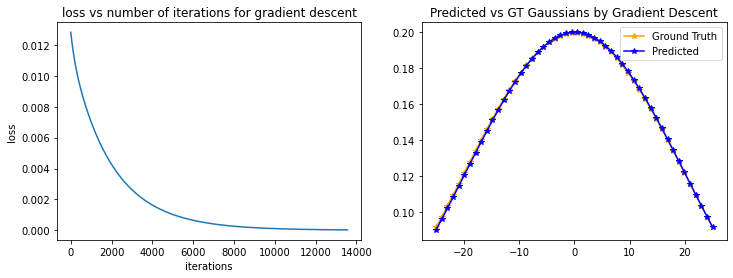

Tolerance reached at epoch: 7614
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.96708348  0.0882919  19.90345576] 
Number of iterations: 50000 , learning rate: 0.2 , tolerance: 1e-08


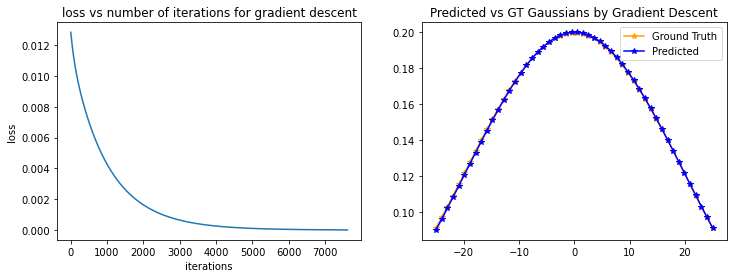

Tolerance reached at epoch: 6312
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.9689848   0.07793871 19.9090163 ] 
Number of iterations: 50000 , learning rate: 0.25 , tolerance: 1e-08


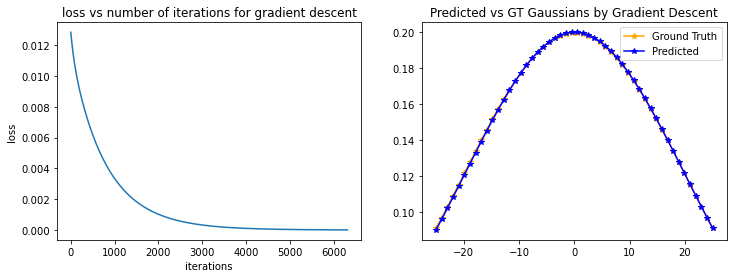

Tolerance reached at epoch: 4241
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.972686    0.05964744 19.91985044] 
Number of iterations: 50000 , learning rate: 0.4 , tolerance: 1e-08


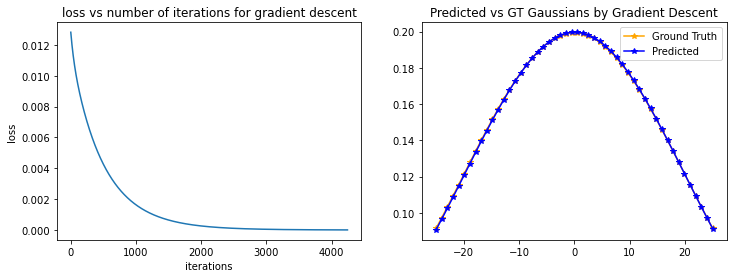

Tolerance reached at epoch: 3509
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.97433224  0.05230963 19.92467285] 
Number of iterations: 50000 , learning rate: 0.5 , tolerance: 1e-08


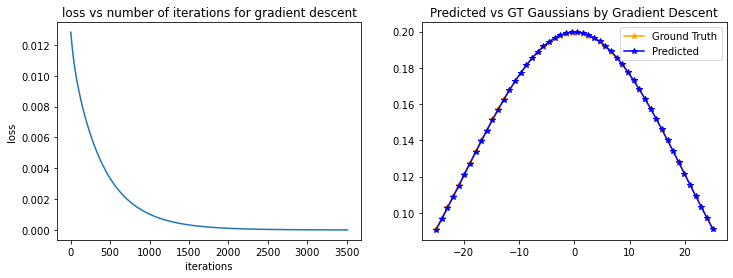

In [218]:
# True params
a, mean, std = 10, 0, 20
true_params = [a, mean, std]

# Initial guess of params
a, mean, std = 10, 3, 19.12
params = [a, mean, std]

# Different learning rates
alpha_all = [0.01, 0.05, 0.075, 0.1, 0.2, 0.25, 0.4, 0.5]
for alpha_i in alpha_all:
    args = get_args_LM(50000, alpha_i, 1e-8, 0.5)
    format_output_Gaussian_LM(true_params, params, args)

From the above plots, we can see that with increase in **learning rate (alpha)**, the convergence is faster i.e., it takes less number of iterations (epochs) to converge to the local minimum. We have given it 50,000 iterations for training, but however, they start converging ven before that. We can see that the number of iterations when convergence is seen decreases gradually with increasing learning rate (alpha).

### Experimentation with tolerance

Tolerance reached at epoch: 1
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.99750947  2.99406996 19.121622  ] 
Number of iterations: 10000 , learning rate: 0.01 , tolerance: 0.001


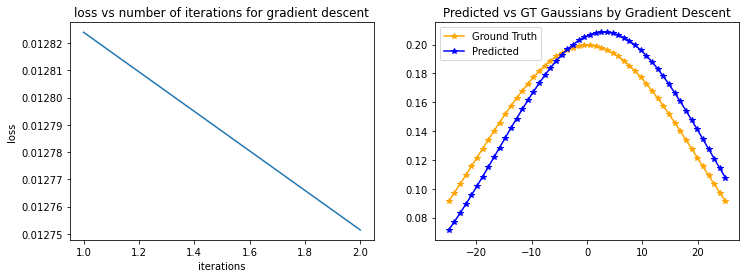

Tolerance reached at epoch: 1
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.99750947  2.99406996 19.121622  ] 
Number of iterations: 10000 , learning rate: 0.01 , tolerance: 0.0001


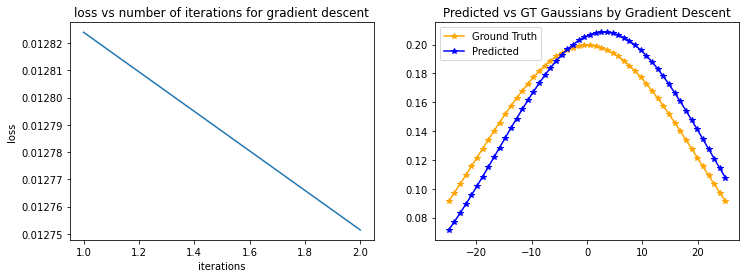

Tolerance reached at epoch: 377
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.8066098   1.44928745 19.54498948] 
Number of iterations: 10000 , learning rate: 0.01 , tolerance: 1e-05


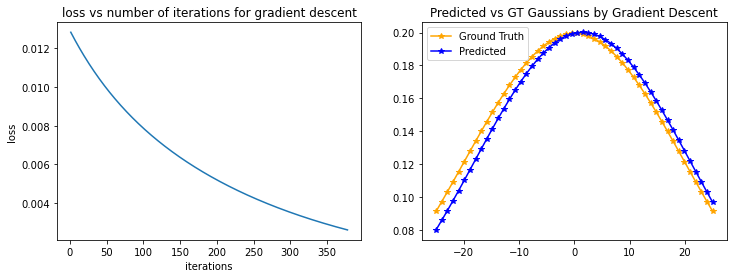

Tolerance reached at epoch: 982
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.91371015  0.46555342 19.7955286 ] 
Number of iterations: 10000 , learning rate: 0.01 , tolerance: 1e-06


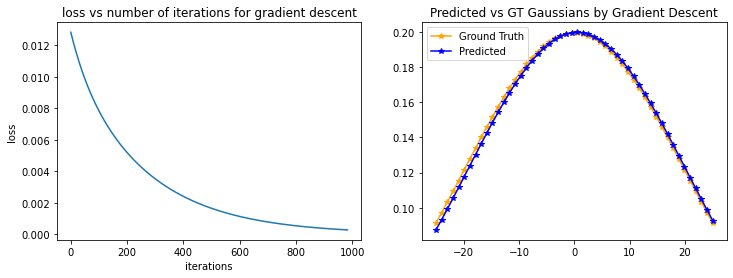

Tolerance reached at epoch: 1616
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.95777957  0.14385099 19.89485329] 
Number of iterations: 10000 , learning rate: 0.01 , tolerance: 1e-07


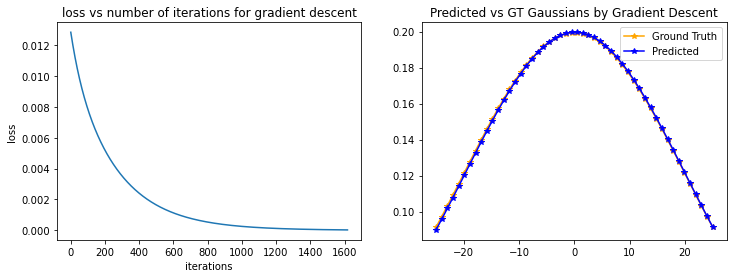

Tolerance reached at epoch: 2303
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.97870443  0.04063556 19.94630726] 
Number of iterations: 10000 , learning rate: 0.01 , tolerance: 1e-08


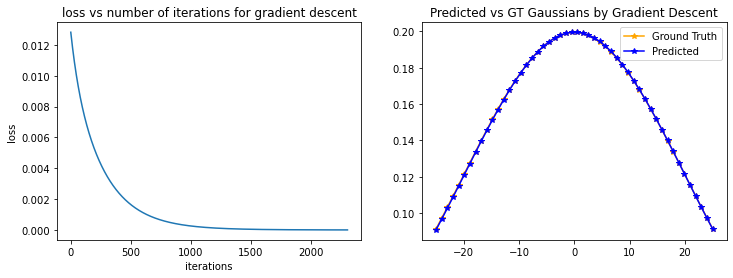

Tolerance reached at epoch: 3112
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99024294e+00 9.22222026e-03 1.99753290e+01] 
Number of iterations: 10000 , learning rate: 0.01 , tolerance: 1e-09


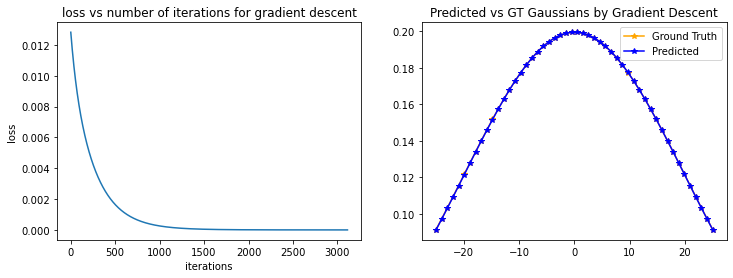

Tolerance reached at epoch: 4132
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [9.99632401e+00 1.42717191e-03 1.99906976e+01] 
Number of iterations: 10000 , learning rate: 0.01 , tolerance: 1e-10


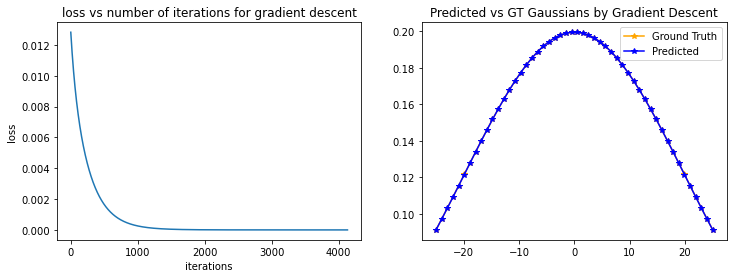

In [224]:
# True params
a, mean, std = 10, 0, 20
true_params = [a, mean, std]

# Initial guess of params
a, mean, std = 10, 3, 19.12
params = [a, mean, std]

# Different tolerances
tol_all = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
for tol_i in tol_all:
    args = get_args_LM(10000, 0.01, tol_i, 0.005)
    format_output_Gaussian_LM(true_params, params, args)

From the above plots, we can see that with increasing tolerance, the parameters learnt is better. This is because if the tolerance is high, then the optimization converges earlier and hence, doesn't learn well. On the contrary, if the tolerance is low, then the parameters are learnt with more accuracy, as the training converges late with good learning of the parameters.

We can see the same from above plots. Learning rate used is 0.01 and number of iterations given to train is 10,000. With increasing tolerance, the number of iterations when it convergence increases and hence learns well. We can observe that from the plot "predicted-ground truth" where we can see that with low tolerance, the predicted values are more nearer to the actual values.

### Experimentation with initializations

Tolerance reached at epoch: 3838
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 3, 19.12] 
Params (a, mean, std): [ 9.97403702  0.05668805 19.92953612] 
Number of iterations: 50000 , learning rate: 0.01 , tolerance: 1e-08


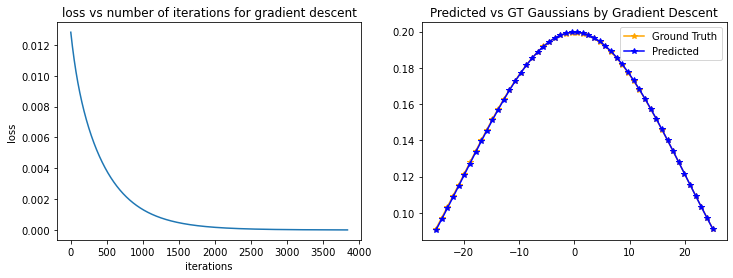

Tolerance reached at epoch: 4724
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [9, 1, 18] 
Params (a, mean, std): [9.95000373e+00 6.14186624e-03 1.98643203e+01] 
Number of iterations: 50000 , learning rate: 0.01 , tolerance: 1e-08


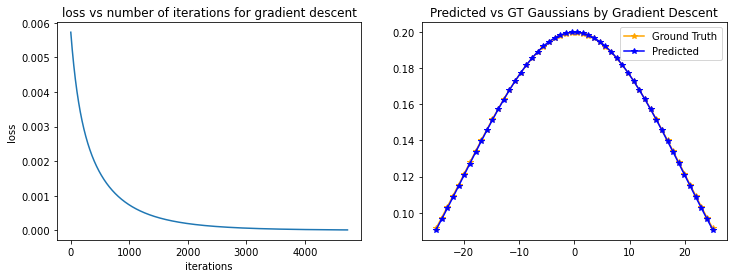

Tolerance reached at epoch: 6818
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [-9, 4, 8] 
Params (a, mean, std): [9.94983654e+00 2.46657828e-03 1.98638670e+01] 
Number of iterations: 50000 , learning rate: 0.01 , tolerance: 1e-08


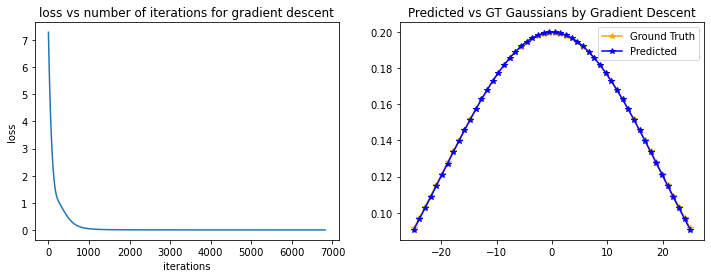

Tolerance reached at epoch: 8336
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [10, 10, 20] 
Params (a, mean, std): [1.00524091e+01 6.46506899e-03 2.01431306e+01] 
Number of iterations: 50000 , learning rate: 0.01 , tolerance: 1e-08


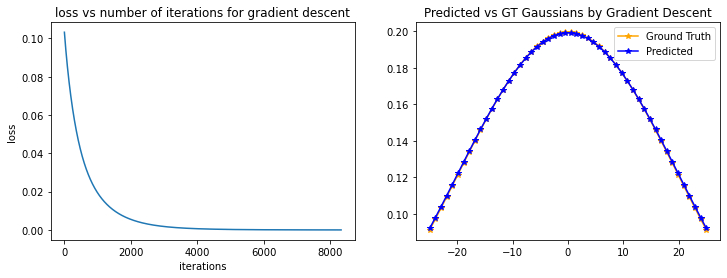

Tolerance reached at epoch: 20828
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [-100, 100, -200] 
Params (a, mean, std): [ -89.52174789  102.05756054 -199.02564098] 
Number of iterations: 50000 , learning rate: 0.01 , tolerance: 1e-08


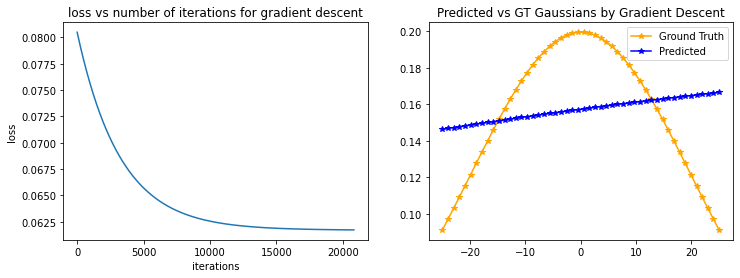

Tolerance reached at epoch: 40310
True Params (a, mean, std): [10, 0, 20] 
Initial Params (a, mean, std): [100, -100, -200] 
Params (a, mean, std): [ -88.67767678 -102.15286516 -199.01262642] 
Number of iterations: 50000 , learning rate: 0.01 , tolerance: 1e-08


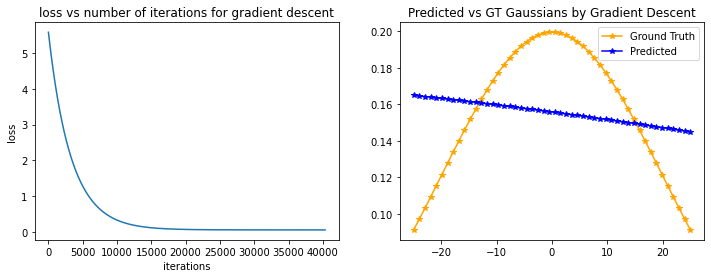

In [229]:
# True params
a, mean, std = 10, 0, 20
true_params = [a, mean, std]

# Initial guess of params
params_all = [[10, 3, 19.12], [9, 1, 18], [-9, 4, 8], [10, 10, 20], [-100, 100, -200], [100, -100, -200]]

for param in params_all:
    args = get_args_LM(50000, 0.01, 1e-8, 0.01)
    format_output_Gaussian_LM(true_params, param, args)

We can see that for most initializations, the parameters are learnt good and the learning curve also depicts that. However, for some initializations, the cost vs iterations plot have few spikes in cost. But however, they learnt the parameters well.

However, for some initializations like [-100, 100, -200] and [100, -100, -200], the training didn't converge to the global optimum. It could have found another local optimum to which it could have converged. Hence, the convergence depends on initialization also.

### Question 1

Choice of initial estimates of parameters and learning rates do affect convergence significantly. We have seen this analysis for various methods above. Analysis with plots are given above.

We saw that with different initializations, some initializations of parameters converged to the global optimum, whereas some did not. This is because for those initializations, there could lie a local minimum nearby to which the optimization algorithm could have converged and hence didn't learn the underlying function. Hence, it is important to feed in good initializations so that convergence happens to global optimum.

We also saw that learning rate affected convergence significantly in all methods. With increasing learning rate the convergence was faster and hence, took few iterations to converge to the nearby optimum (which was global optimum in our case because we gave good initialization). However, sometimes with huge learning rates, the optimization algorithm could diverge from the optimum rather than converging hence, pushing it away to some other local minimum (or it might never converge). This is because of excessive oscillations due to high learning rates. We can see an example of this in section 1.2 where using learning rate of 0.01 for another non linear given didn't converge, whereas it diverged and learnt some other function, whose parameters could be in some other local minimum.

### Question 2

Yes, we observe differences in the three optimizers. We have already seen through experimentations that the convergence was much faster in Gauss-Newton than other two optimizers (Gradient Descent and LM). We saw that using same hyperparameters as those used in Gradient Descent optimizer in Gauss-Newton optimizer, the convergence was very much quicker (just a few iterations). This is because Gauss-Newton optimizer uses the curvature information (through Jacobian matrix) for update step, whereas Gradient Descent optimizer uses local gradient information only. Hence, by intuition Gauss-Newton optimizer update is much better and hence it converges faster.

In LM optimizer, there is a combination of Gradient Descent and Gauss-Newton. Hence, there is a combination of curvature information and local gradient information. Hence, this updates more responsibly and better. This hybrid optimizer is considered better than other 2 optimizers due to usage of both information (global curvature information and local gradient information). Even though it uses curvature information, the convergence is not as fast as Gauss-Newton optimizer, because of presence of gradient information. Hence, even at steep slopes, LM takes small step to avoid overshooting, whereas Gauss-Newton takes bigger steps and overshoots.

Hence, Gradient Descent uses local gradient information for update, Gauss-Newton optimizer uses global curvature information for the update and LM optimizer uses both informations (hybrid).

# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences.

## 2.1: Procrustes alignment

1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.
2. Use the bunny point cloud in data folder and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.
3. Make sure your code is modular as we will use this function in the next sub-part.
4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.


In [2]:
# Function to obtain point cloud (pcd) and frame corresponding to it (frame)
def get_pcd_frame(pts, rot, trans):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(pts)
    frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.2, origin=pcd.get_center())
    
    # Apply translation
    if trans is not None:
        pcd.translate(trans)
        frame.translate(trans)
    
    # Apply rotation
    if rot is not None:
        pcd.rotate(rot)
        frame.rotate(rot)
        
    return pcd, frame

def get_pcd(pts, color=None):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(pts)
    
    if color is not None:
        pcd.paint_uniform_color(color)
        
    return pcd

# Function to visualize geometries
def visualize_geometries(geometries, colors=None):
    viewer = o3d.visualization.Visualizer()
    viewer.create_window()
    
    counter = 0
    # Add geometries to visualizer
    for geometry in geometries:
        if type(geometry) == np.ndarray:
            pcd = get_pcd(geometry, colors[counter])
            counter += 1
            geometry = pcd
        viewer.add_geometry(geometry)
        
    # Render the geometries
    opt = viewer.get_render_option()
    viewer.run()
    viewer.destroy_window()
    
# Function to save image
def save_vis_image(geometries_pcd, path):
    vis = o3d.visualization.Visualizer()
    vis.create_window(visible=False)
    
    for geometry in geometries_pcd:
        vis.add_geometry(geometry)
        
    vis.poll_events()
    vis.update_renderer()
    vis.capture_screen_image(path)
    vis.destroy_window()

In [3]:
# Function to obtain procrustes alignment
def orthogonal_procrustes_alignment(pts_1, pts_2):
    # n -> number of points in pcd
    # d -> number of dimensions (3)
    n, d = pts_1.shape
    
    # Centroids of both point clouds
    centroid_1 = np.mean(pts_1, axis=0)
    centroid_2 = np.mean(pts_2, axis=0)
    
    # Normalized points (points - center)
    pts_1_normalized = pts_1 - centroid_1
    pts_2_normalized = pts_2 - centroid_2
    
    # SVD
    H = pts_1_normalized.T @ pts_2_normalized
    U, S, Vt = np.linalg.svd(H)
    
    # Rotation matrix
    R = U @ Vt
    
    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = U @ Vt
    
    # Translation vector
    t = centroid_1 - R @ centroid_2
    
    # Transformation matrix
    T = np.eye(d+1)
    T[:d, :d] = R
    T[:d, d] = t
    
    return T, R, t

In [5]:
# Bunny point cloud
pcd = o3d.io.read_point_cloud('./data/bunny.ply')
pts = np.asarray(pcd.points)

# First pcd and frame (pcd1, frame1)
pcd1, frame_1 = get_pcd_frame(pts, rot=None, trans=None)
pcd1.paint_uniform_color([0, 1, 0])

# Second pcd and frame (random transformation) (pcd2, frame2)
trans = (0.25, 0, 0)
rot = pcd1.get_rotation_matrix_from_xyz((np.pi/4, 0, 0))
pcd2, frame_2 = get_pcd_frame(pts, rot=rot, trans=trans)
pcd2.paint_uniform_color([1, 0.6, 0])

# Visualize both PCDs
visualize_geometries([pcd1, frame_1, pcd2, frame_2])
save_vis_image([pcd1, frame_1, pcd2, frame_2], "./outputs/2.2/transformed_bunnies.png")

In [6]:
# Points (np array) of pcd1, pcd2
pts_1 = np.asarray(pcd1.points)
pts_2 = np.asarray(pcd2.points)

# Obtain transformation matrix from orthogonal procrustes
T, R, t = orthogonal_procrustes_alignment(pts_1, pts_2)
print("Transformation matrix by procrustes alignment:\n", T)

Transformation matrix by procrustes alignment:
 [[ 1.00000000e+00 -8.76836732e-17  7.57756830e-17 -2.50000000e-01]
 [ 1.63705731e-16  7.07106781e-01  7.07106781e-01  2.15615729e-02]
 [-2.81178376e-17 -7.07106781e-01  7.07106781e-01  6.99484708e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


We used a transformation on pcd1 to get pcd2. On applying Procrustes alignment, it return T_21, which is inverse transformation from pcd2 to pcd1. Hence, we can see that the rotation submatrix is transpose of actual transformation used on pcd1. And similarly, the translation vector is negative of the actual translation vector used to obtain pcd2 from pcd1.

### Question 2.1.4

Let the 3D points in two point clouds be $ p = \{p_1, p_2, p_3, ...\} $ and $ q = \{q_1, q_2, q_3, ....\} $

We want to optimize E(R, t) where,

$ E(R, t) = argmin_{R,t} \sum{||Rp_i+t-q_i||^2} $

First, lets assume we know rotation (R) and solve for translation (t)

$ \frac{d E}{d t} = 0 $

$ \sum{2(Rp_i+t-q_i)} = 0 $

$ 2R\sum{p_i} + 2t \sum{1} - 2\sum{q_i} = 0$

Let $ \mu_p = \frac{\sum{p_i}}{n} and \mu_q = \frac{\sum{q_i}}{n} $

Then,

$ 2R\mu_pn + 2tn - 2\mu_qn = 0 $

Hence, $ t = \mu_q - R \mu_p $

Hence, we got translation vector. Now, we need to get the rotation matrix

Now, lets substitute t in the error function E,

E = $ \sum{||Rp_i + t - q_i||^2} = \sum{||Rp_i + \mu_q - R\mu_p - q_i||^2} $

$ = \sum{||R(p_i-\mu_p)-(q_i-\mu_q)||^2} $

Let $ p_i^{'} = p_i - \mu_p $ and $ q_i^{'} = q_i - \mu_q $

$ = \sum{||Rp_i^{'} - q_i^{'} ||^2} $

$ ||Rp_i^{'} - q_i^{'}||^2 = p_i^{'T}p_i^{'} - 2q_i^{'T}Rp_i + q_i^{'T}q_i^{'} $

We have to solve $ argmin_{R} -2\sum{q_i^{'T}Rp_i^{'}} $,

Let vector $ p^{'} $ be x and $ q^{'} $ be y

Using property $ tr(AB) = tr(BA) $, we get

$ tr(y^TRx) = tr(Rxy^T) $

Consider covariance matrix $ S = xy^T $,

Now taking SVD of the above covariance matrix S, we get

$ S = U\sum V^T $

then, $ tr(Rxy^T) = tr(RU\sum V^T) = tr(\sum V^TRU) $,

where V, R, and U are orthogonal matrices

The trace of the matrix is minimized when $ V^TRU = I $,

hence $ R = VU^T $

If $ det(VU^T) = -1 $, then it contains reflection and hence it is not rotation matrix

We need to invert one row of the rotation matrix

We see that we got the transformation matrix (rotation and translation) by doing first order derivative method to find the optimal values for minimization of the error function E(R, t)
 
Hence, this gives the best alignment transform if the correspondences between p and q are known

Hence, we see that Procrustes alignment gives best aligning transform as discussed above when the correspondences are known

## 2.2: ICP alignment

1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.
2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames.
3. Does ICP always give the correct alignment? Why or Why not?
4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

In [8]:
def ICP_alignment(pts_1, frame_1, pts_2, frame_2, num_iters=10, tol=0.0001, visualize=False):
    pts1 = copy.deepcopy(pts_1)
    frame1 = copy.deepcopy(frame_1)
    pts2 = copy.deepcopy(pts_2)
    frame2 = copy.deepcopy(frame_2)
    
    # Visualize
    visualize_geometries([pts1, frame1, pts2, frame2], colors=[[0, 1, 0], [1, 0.6, 0]])
    
    # Previous iteration distance
    dist_prev = np.mean(np.abs(pts1 - pts2))
    
    # Transformation matrix
    T_accum = np.eye(pts1.shape[1]+1)
    
    for iter in range(num_iters):
        # Find correspondences
        tree = KDTree(pts1)
        distances, indices = tree.query(pts2, 1)
        distances = distances.squeeze()
        indices = indices.squeeze()
        
        # Check for tolerance
        if (iter != 0) and (np.abs(np.mean(distances) - dist_prev) < tol):
            print("Tolerance reached!!")
            break
        else:
            dist_prev = np.mean(distances)
        
        # Obtain pts2 according to correspondences
        pts2_nearest = pts2[indices, :]
        # Obtain procrusted alignment
        T, R, t = orthogonal_procrustes_alignment(pts1, pts2_nearest)
        
        # Accumulate transformation matrix
        T_accum = T_accum @ np.linalg.inv(T)
        
        # Apply T to pts2 to update
        pts2 = (R @ pts2.T).T + t
        if frame2 is not None:
            frame2 = frame2.transform(T)
        
        # Visualize at each iteration
        if visualize:
            visualize_geometries([pts1, frame1, pts2, frame2], colors=[[0, 1, 0], [1, 0.6, 0]])
            
        print("Iteration: " + str(iter) + ", Distance: " + str(dist_prev))
            
    # Final visualization
    if not visualize:
        visualize_geometries([pts1, frame1, pts2, frame2], colors=[[0, 1, 0], [1, 0.6, 0]])
        
    tmp_pcd1 = get_pcd(pts, [0, 1, 0])
    tmp_pcd2 = get_pcd(pts, [1, 0.6, 0])
    save_vis_image([tmp_pcd1, frame1, tmp_pcd2, frame2], "./outputs/2.2/aligned_bunnies.png")
        
    return T_accum

In [9]:
T = ICP_alignment(pts_1, frame_1, pts_2, frame_2, num_iters=50, tol=1e-4, visualize=False)

print("\nTransformation matrix obtained from ICP:\n", T)

Iteration: 0, Distance: 0.1722642797384596
Iteration: 1, Distance: 0.046574912703080236
Iteration: 2, Distance: 0.019362763108581902
Iteration: 3, Distance: 0.01797542279880371
Iteration: 4, Distance: 0.013775042881403618
Iteration: 5, Distance: 0.01261867025335526
Iteration: 6, Distance: 0.010492615276493719
Iteration: 7, Distance: 0.00926558141101426
Iteration: 8, Distance: 0.007792948430336782
Iteration: 9, Distance: 0.0068648203568712545
Iteration: 10, Distance: 0.005920756119635435
Iteration: 11, Distance: 0.005387527234510964
Iteration: 12, Distance: 0.004640750322647052
Iteration: 13, Distance: 0.004277255187863328
Iteration: 14, Distance: 0.0036552648098151057
Iteration: 15, Distance: 0.003363846715433907
Iteration: 16, Distance: 0.002835096968144386
Iteration: 17, Distance: 0.002585098252135301
Iteration: 18, Distance: 0.002160542301206721
Iteration: 19, Distance: 0.0019432394037250638
Iteration: 20, Distance: 0.001629340163027012
Iteration: 21, Distance: 0.001454738160163633


### Question 2.2.3

ICP doesn't give correct alignment always. When the transformations are small, it is easy to find correspondences and converge to the optimal transformation. However, sometimes when the transformation is complex with various rotations and translations, it becomes difficult to find the transformation matrix. It is because it becomes difficult to find correspondences when there are complex transformations between two point clouds.

### Question 2.2.4

Lots of ICP variants are proposed based on following stages of ICP,
* Point subsets
* Weighting the correspondences
* Data association
* Rejecting outlier pairs (correspondences)

Some of the variants of ICP based on data association are,
* Closest Point matching
* Normal Shooting
* Point to Plane error metric
* Projection based matching

These variants mainly differ in the method of obtaining correspondences for ICP algorithm. Similary there are other variants based on other stages of ICP also.

These other variants of ICP are helpful in better convergence in particular scenarios. Some transformation problems might require different types of correspondences, or different kinds of point subsets etc, due to which different variants of ICP is useful in different situations.